# Clustering using TCGA samples 

In [1]:
import pandas as pd
import numpy as np
import sklearn


## Load the dataset

In [2]:
df = pd.read_csv('../Data/data.csv')

In [3]:
df.head()

Unnamed: 0  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0  TCGA-AD-5900-01              10.670              0.000               10.38   
1  TCGA-BP-4968-01              11.580              5.298               10.51   
2  TCGA-NG-A4VU-01               9.693              3.262               11.00   
3  TCGA-CG-4305-01              10.260              0.000               11.10   
4  TCGA-AO-A03M-01              10.100              1.997               11.74   

   ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0               9.036               8.496               8.563   
1               9.421               7.842              10.280   
2               9.155               9.683               7.383   
3               9.465               9.078               9.173   
4              10.380               9.157               8.509   

   ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
0              10.050               11.44              10.860  ...   
1              12.410               12.69              10.940  ...   
2               8.848               11.19               9.806  ...   
3              12.320               12.09              12.220  ...   
4              11.630               11.80              10.580  ...   

   ENSG00000280314.1  ENSG00000280670.2  ENSG00000280789.1  ENSG00000280969.1  \
0                0.0              6.704             10.920             0.0000   
1                0.0              7.174             11.350             0.0000   
2                0.0              6.339             10.810             0.0000   
3                0.0              6.743              9.858             0.9198   
4                0.0              6.842             11.800             0.0000   

   ENSG00000281106.2  ENSG00000281991.1  ENSG00000282419.1  ENSG00000282608.1  \
0             0.9745              9.797                0.0              7.375   
1             3.7550              9.462                0.0              9.454   
2             6.5250              4.545                0.0              7.105   
3             2.4490              8.339                0.0              8.972   
4             1.4830              9.843                0.0              8.691   

   ENSG00000282757.1  ENSG00000282815.1  
0                0.0             0.0000  
1                0.0             0.8746  
2                0.0             0.0000  
3                0.0             0.0000  
4                0.0             3.8250  

[5 rows x 19038 columns]

In [4]:
df = df.set_index('Unnamed: 0')

In [5]:
df = df.sample(frac = 1)

In [6]:
df.head()

ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
Unnamed: 0                                                                   
TCGA-ET-A3DW-01               11.80             1.5840               10.78   
TCGA-L5-A8NL-01               10.01             0.6623               10.86   
TCGA-NC-A5HM-01               12.04             0.0000               12.12   
TCGA-BH-A1EO-11               11.78            10.8100               11.01   
TCGA-GU-AATP-01               12.45             0.0000               11.26   

                 ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
Unnamed: 0                                                                    
TCGA-ET-A3DW-01              10.140               8.743               9.059   
TCGA-L5-A8NL-01               9.422               9.346               9.413   
TCGA-NC-A5HM-01               8.824               9.758               8.257   
TCGA-BH-A1EO-11               9.578               8.361              11.240   
TCGA-GU-AATP-01              10.240              10.850               9.153   

                 ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  \
Unnamed: 0                                                                    
TCGA-ET-A3DW-01               12.88               12.21               11.41   
TCGA-L5-A8NL-01               12.60               12.78               12.04   
TCGA-NC-A5HM-01               12.86               12.55               12.29   
TCGA-BH-A1EO-11               14.34               12.29               11.51   
TCGA-GU-AATP-01               12.32               12.67               11.78   

                 ENSG00000001167.14  ...  ENSG00000280314.1  \
Unnamed: 0                           ...                      
TCGA-ET-A3DW-01               11.42  ...                0.0   
TCGA-L5-A8NL-01               10.50  ...                0.0   
TCGA-NC-A5HM-01               10.15  ...                0.0   
TCGA-BH-A1EO-11               10.50  ...                0.0   
TCGA-GU-AATP-01               11.18  ...                0.0   

                 ENSG00000280670.2  ENSG00000280789.1  ENSG00000280969.1  \
Unnamed: 0                                                                 
TCGA-ET-A3DW-01              5.671              11.38              1.584   
TCGA-L5-A8NL-01              6.610              10.09              0.000   
TCGA-NC-A5HM-01              6.615              11.25              0.000   
TCGA-BH-A1EO-11              5.437              10.15              0.000   
TCGA-GU-AATP-01              8.651              12.43              0.000   

                 ENSG00000281106.2  ENSG00000281991.1  ENSG00000282419.1  \
Unnamed: 0                                                                 
TCGA-ET-A3DW-01              1.999             11.500                0.0   
TCGA-L5-A8NL-01              2.642              8.415                0.0   
TCGA-NC-A5HM-01              0.000             10.870                0.0   
TCGA-BH-A1EO-11              0.000              7.296                0.0   
TCGA-GU-AATP-01              0.000             11.590                0.0   

                 ENSG00000282608.1  ENSG00000282757.1  ENSG00000282815.1  
Unnamed: 0                                                                
TCGA-ET-A3DW-01              6.628                0.0             0.0000  
TCGA-L5-A8NL-01              8.619                0.0             0.6623  
TCGA-NC-A5HM-01              4.383                0.0             8.6340  
TCGA-BH-A1EO-11              8.153                0.0             0.0000  
TCGA-GU-AATP-01              8.278                0.0             0.0000  

[5 rows x 19037 columns]

In [7]:
df.isnull().values.any()

False

## We will use the Interquartile Range Method (IQR) to remove outliers in our dataset

In [8]:
Q1 = np.percentile(df,25)
Q3 = np.percentile(df,75)
IQR = Q3 - Q1

In [9]:
df_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
df_outliers.shape

(8135, 19037)

In [11]:
df_outliers.head()

ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
Unnamed: 0                                                                   
TCGA-L5-A8NL-01               10.01             0.6623               10.86   
TCGA-NC-A5HM-01               12.04             0.0000               12.12   
TCGA-BH-A1EO-11               11.78            10.8100               11.01   
TCGA-BH-A1F8-01               12.17             1.3000               12.14   
TCGA-CR-7390-01               11.22             0.0000               10.76   

                 ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
Unnamed: 0                                                                    
TCGA-L5-A8NL-01               9.422               9.346               9.413   
TCGA-NC-A5HM-01               8.824               9.758               8.257   
TCGA-BH-A1EO-11               9.578               8.361              11.240   
TCGA-BH-A1F8-01              10.430               9.285               6.722   
TCGA-CR-7390-01               9.884               9.767               8.796   

                 ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  \
Unnamed: 0                                                                    
TCGA-L5-A8NL-01               12.60               12.78               12.04   
TCGA-NC-A5HM-01               12.86               12.55               12.29   
TCGA-BH-A1EO-11               14.34               12.29               11.51   
TCGA-BH-A1F8-01               11.56               13.52               12.49   
TCGA-CR-7390-01               11.19               11.69               14.77   

                 ENSG00000001167.14  ...  ENSG00000280314.1  \
Unnamed: 0                           ...                      
TCGA-L5-A8NL-01               10.50  ...                0.0   
TCGA-NC-A5HM-01               10.15  ...                0.0   
TCGA-BH-A1EO-11               10.50  ...                0.0   
TCGA-BH-A1F8-01               12.03  ...                0.0   
TCGA-CR-7390-01               11.31  ...                0.0   

                 ENSG00000280670.2  ENSG00000280789.1  ENSG00000280969.1  \
Unnamed: 0                                                                 
TCGA-L5-A8NL-01              6.610              10.09                0.0   
TCGA-NC-A5HM-01              6.615              11.25                0.0   
TCGA-BH-A1EO-11              5.437              10.15                0.0   
TCGA-BH-A1F8-01              6.596              10.02                0.0   
TCGA-CR-7390-01              5.983              10.81                0.0   

                 ENSG00000281106.2  ENSG00000281991.1  ENSG00000282419.1  \
Unnamed: 0                                                                 
TCGA-L5-A8NL-01              2.642              8.415                0.0   
TCGA-NC-A5HM-01              0.000             10.870                0.0   
TCGA-BH-A1EO-11              0.000              7.296                0.0   
TCGA-BH-A1F8-01              3.055              9.667                0.0   
TCGA-CR-7390-01              1.804             10.640                0.0   

                 ENSG00000282608.1  ENSG00000282757.1  ENSG00000282815.1  
Unnamed: 0                                                                
TCGA-L5-A8NL-01              8.619                0.0             0.6623  
TCGA-NC-A5HM-01              4.383                0.0             8.6340  
TCGA-BH-A1EO-11              8.153                0.0             0.0000  
TCGA-BH-A1F8-01              8.960                0.0             0.0000  
TCGA-CR-7390-01              6.289                0.0             0.0000  

[5 rows x 19037 columns]

In [12]:
df_train_scaled = df_outliers[:6508] # we keep 80% as our train data
test = df_outliers[6508:8135]

## Now that we have our datasets, we will apply dimensionality reduction before ultimately performing clustering

###  PCA

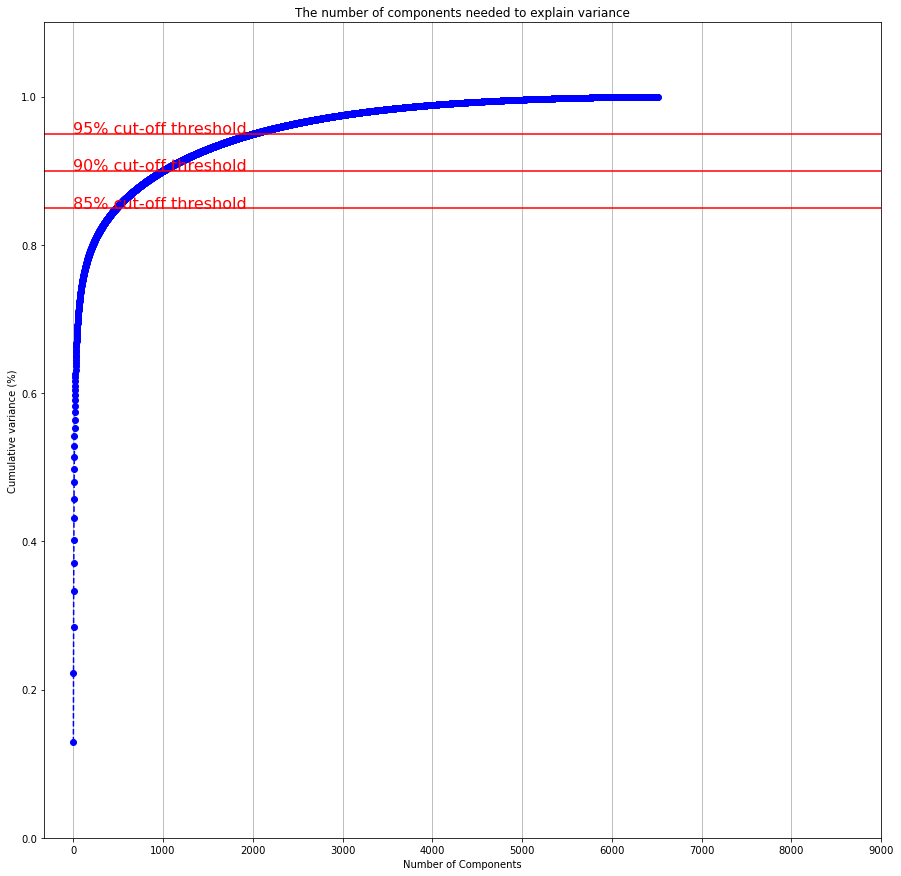

In [13]:
from sklearn.decomposition import PCA

import numpy as np
pca = PCA().fit(df_train_scaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)

fig, ax = plt.subplots()
xi = np.arange(1, 6509, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10000, step=1000)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.1, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#### We will use a variance of 85% as it has a drastic effect on the number of components kept

In [14]:
#We will apply PCA
from sklearn.decomposition import PCA
'''make an instance of the Model, either set n.comps or target variance'''
#pca = PCA()
pca_85 = PCA(0.85)

'''fit PCA on dataset.'''
principalComponents_85 = pca_85.fit_transform(df_train_scaled)

'''print number of components'''
print("n.comps:", pca_85.n_components_)

principal85_df = pd.DataFrame(data = principalComponents_85)

n.comps: 481


In [15]:
principal85_df.head()

0          1           2          3          4          5    \
0  -44.340434 -27.548819   38.916451  18.883992  19.417635  27.501746   
1  -84.499723  36.135381  -71.433736 -12.842901  28.665609 -25.965144   
2   40.051365 -46.811568   40.683288  63.127987 -81.184653 -43.649422   
3  -23.809430   9.903918   20.776555 -49.159368 -88.495049  11.938449   
4 -123.433379   7.117750 -119.414455  15.158819  26.074795 -77.401014   

         6          7          8          9    ...       471       472  \
0 -66.817732 -34.651541 -19.536457 -17.430588  ... -1.442630 -0.231811   
1  22.089491  25.636130  -2.315667  -0.383832  ... -0.935838 -0.643452   
2 -44.774998 -33.712807  24.563564  19.090195  ...  1.778398  0.177931   
3 -33.108484 -11.718984 -86.367216 -17.595617  ...  1.616812  2.052183   
4 -37.587520  27.789326 -14.910643 -33.725170  ...  0.657732 -2.503549   

        473       474       475       476       477       478       479  \
0 -1.254724  3.237689  2.582178 -0.538963 -0.109379 -5.421014 -0.884220   
1 -2.711615  1.576327 -1.088695  4.902609  1.793641 -0.647235  1.379770   
2  0.429565 -1.744108  2.481118  1.774389 -0.575611  0.001746  1.289172   
3  4.197408 -2.388651 -1.741130 -1.479228  0.097072  1.512894 -1.256393   
4  0.077779 -3.873347  0.517374  1.725229 -1.966630 -2.704901 -2.841773   

        480  
0 -2.719889  
1  0.257265  
2  0.350668  
3  6.983091  
4 -4.646119  

[5 rows x 481 columns]

## Now we will perform the clustering using multiple algorithms starting from kmeans


### 1) K-means

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


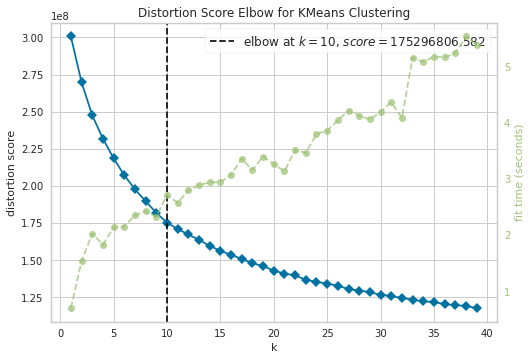

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,40))

visualizer.fit(principal85_df)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

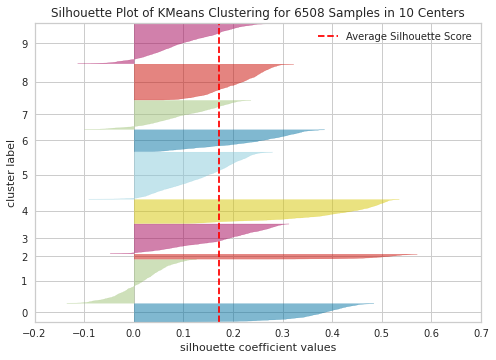

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 6508 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import SilhouetteVisualizer


model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(principal85_df)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

In [18]:
from sklearn.metrics import silhouette_score

labels = model.fit_predict(principal85_df)

print(silhouette_score(principal85_df, labels))

0.17088117737503003


----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.20451035171066598


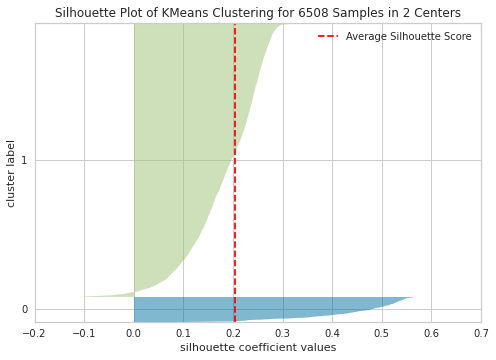

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.12933745888374493


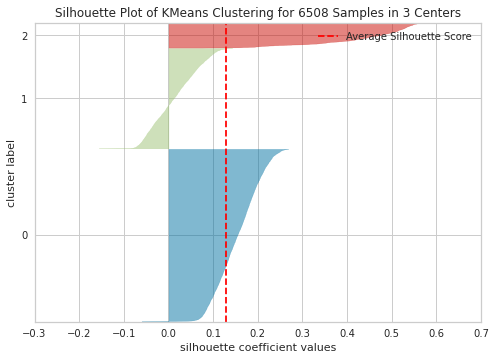

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.11252901753414336


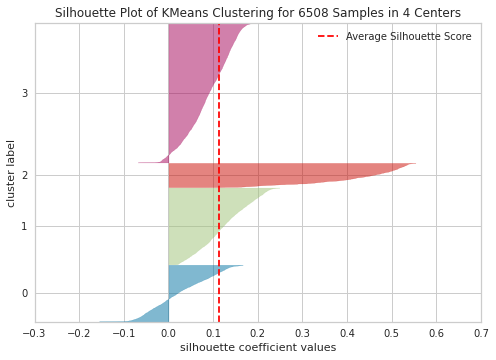

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.12875667935459092


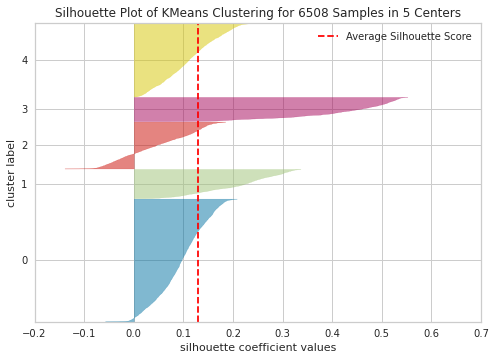

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : 0.12945507693043737


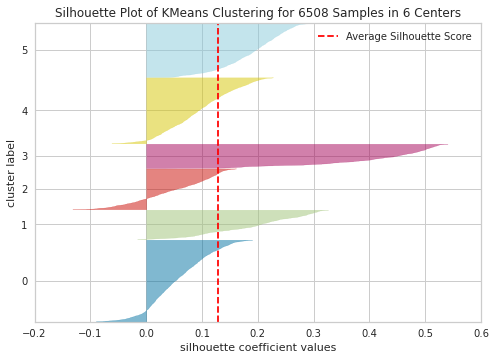

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.1452758993843875


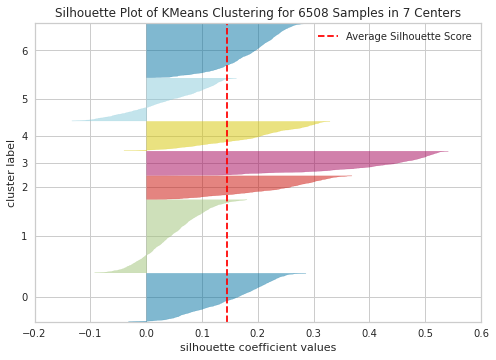

----------------------------------------------------------------------
For n_clusters = 8 The average silhouette_score is : 0.15510221691622145


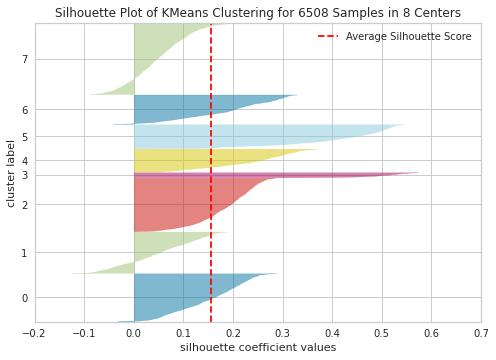

----------------------------------------------------------------------
For n_clusters = 9 The average silhouette_score is : 0.16185159695798507


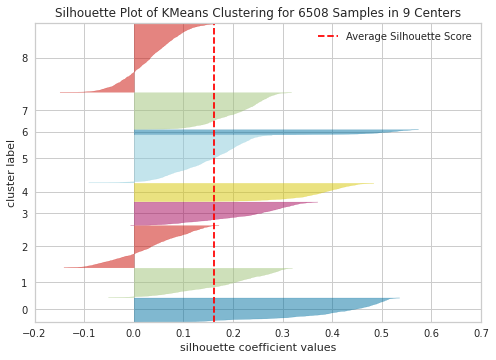

----------------------------------------------------------------------
For n_clusters = 10 The average silhouette_score is : 0.17088117737503003


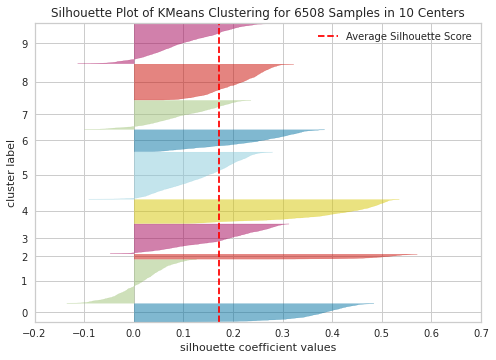

----------------------------------------------------------------------
For n_clusters = 11 The average silhouette_score is : 0.17891566666516587


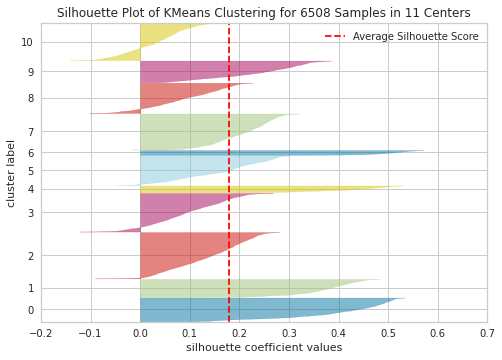

----------------------------------------------------------------------
For n_clusters = 12 The average silhouette_score is : 0.18147943216538548


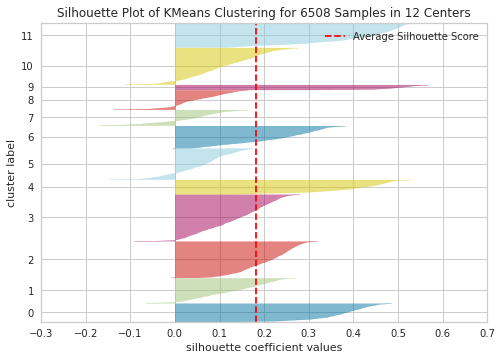

----------------------------------------------------------------------
For n_clusters = 13 The average silhouette_score is : 0.1917686953737805


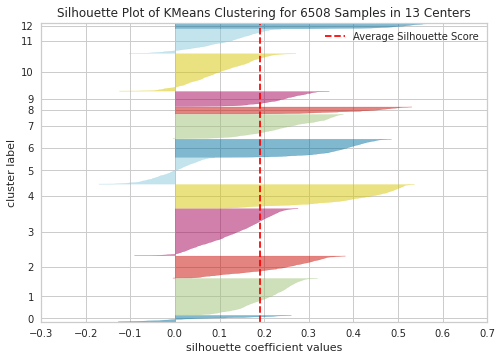

----------------------------------------------------------------------
For n_clusters = 14 The average silhouette_score is : 0.17774540050939888


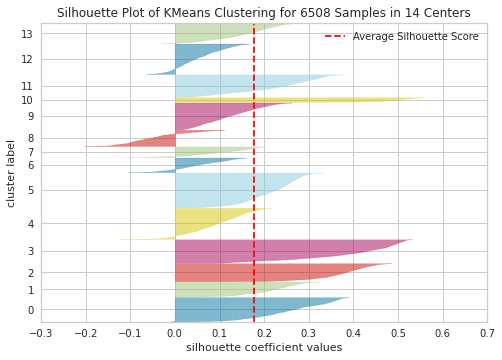

----------------------------------------------------------------------
For n_clusters = 15 The average silhouette_score is : 0.18638650706233295


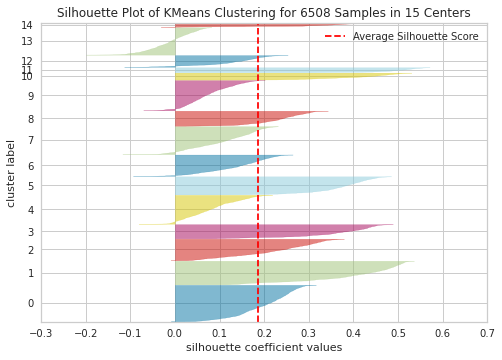

----------------------------------------------------------------------
For n_clusters = 16 The average silhouette_score is : 0.2032435675780466


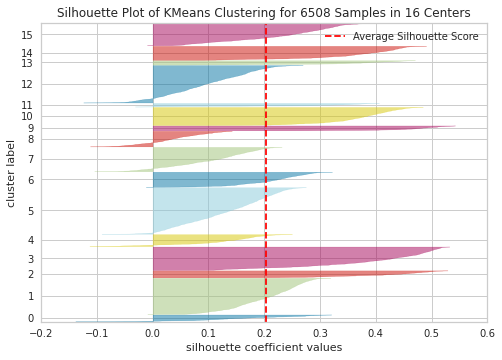

----------------------------------------------------------------------
For n_clusters = 17 The average silhouette_score is : 0.17347473535561048


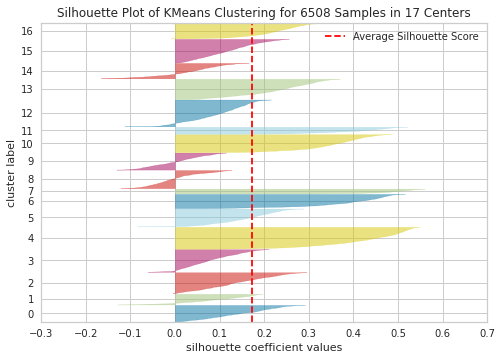

----------------------------------------------------------------------
For n_clusters = 18 The average silhouette_score is : 0.18039498136620197


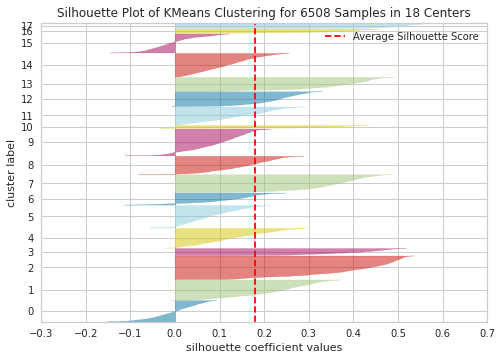

----------------------------------------------------------------------
For n_clusters = 19 The average silhouette_score is : 0.1821566762900045


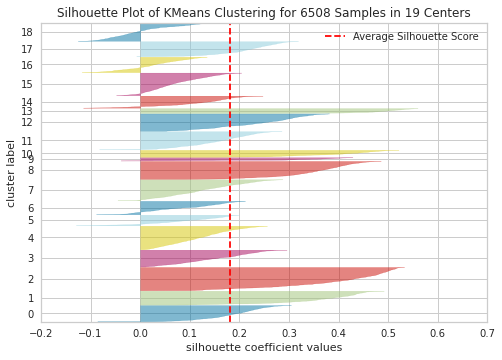

----------------------------------------------------------------------
For n_clusters = 20 The average silhouette_score is : 0.18476000050981772


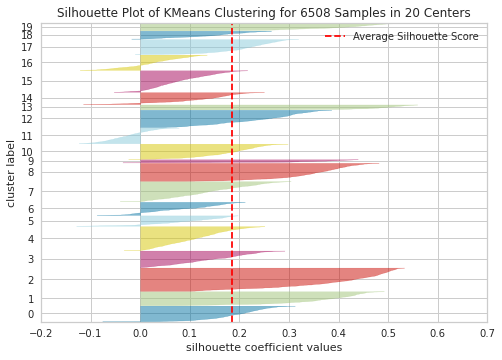

----------------------------------------------------------------------
For n_clusters = 21 The average silhouette_score is : 0.18655528297949317


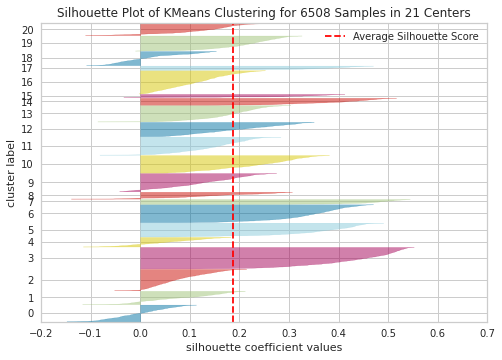

----------------------------------------------------------------------
For n_clusters = 22 The average silhouette_score is : 0.18848830821369605


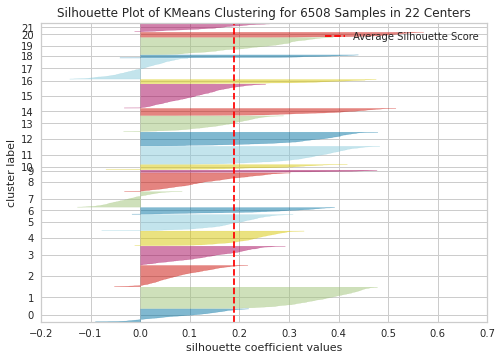

----------------------------------------------------------------------
For n_clusters = 23 The average silhouette_score is : 0.17220973809985177


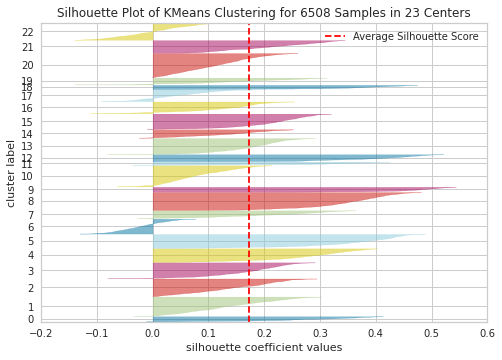

----------------------------------------------------------------------
For n_clusters = 24 The average silhouette_score is : 0.1763979805361644


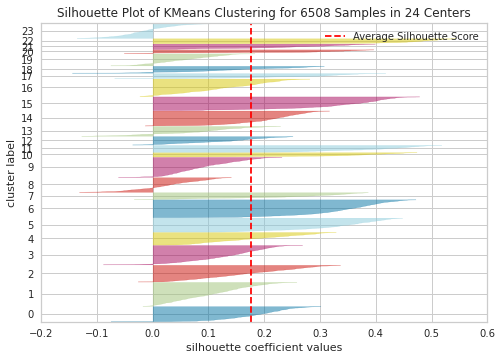

----------------------------------------------------------------------
For n_clusters = 25 The average silhouette_score is : 0.17553997732600501


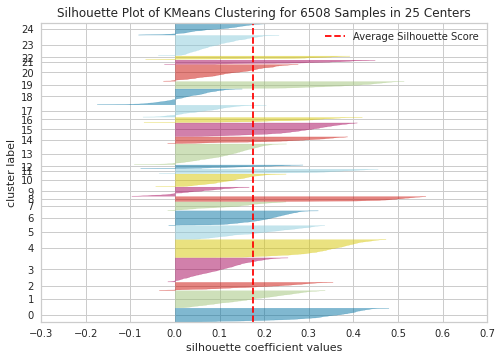

----------------------------------------------------------------------
For n_clusters = 26 The average silhouette_score is : 0.1674506224448095


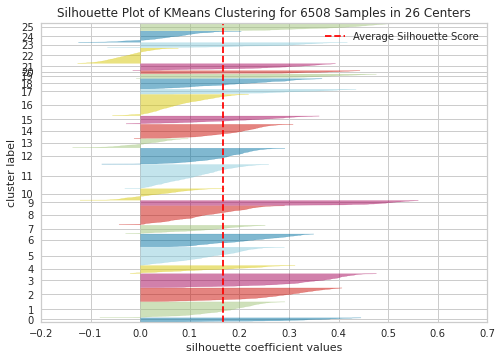

----------------------------------------------------------------------
For n_clusters = 27 The average silhouette_score is : 0.1751148765365014


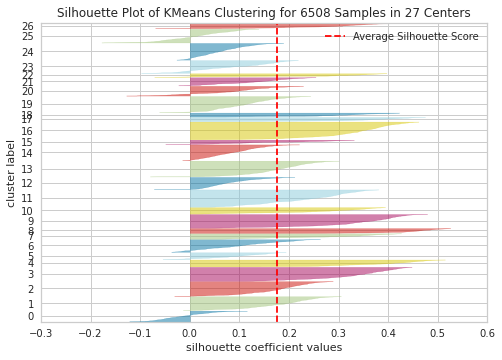

----------------------------------------------------------------------
For n_clusters = 28 The average silhouette_score is : 0.18273152586635621


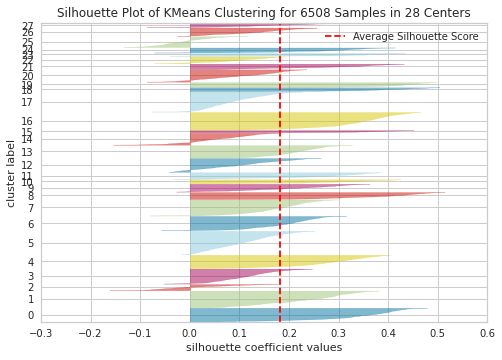

----------------------------------------------------------------------
For n_clusters = 29 The average silhouette_score is : 0.16876992688695422


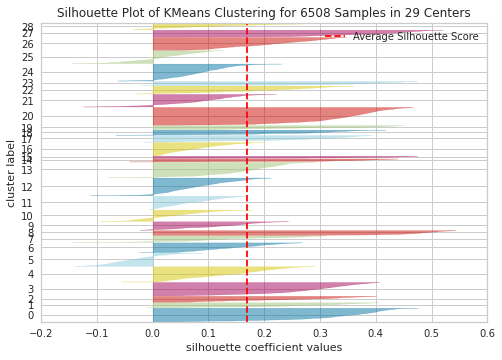

----------------------------------------------------------------------
For n_clusters = 30 The average silhouette_score is : 0.15995112030688055


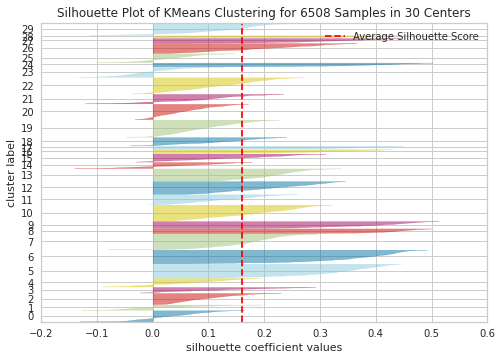

----------------------------------------------------------------------
For n_clusters = 31 The average silhouette_score is : 0.17833965914706984


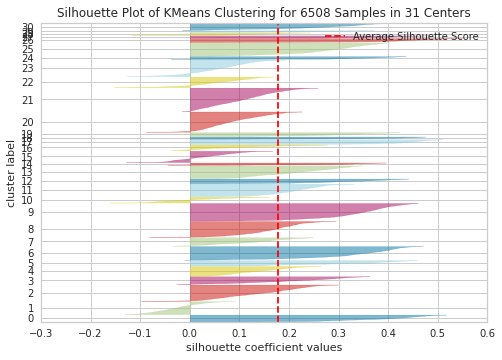

----------------------------------------------------------------------
For n_clusters = 32 The average silhouette_score is : 0.17096888778151342


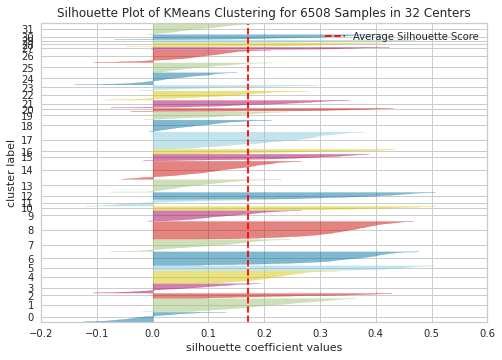

----------------------------------------------------------------------
For n_clusters = 33 The average silhouette_score is : 0.1632839162516051


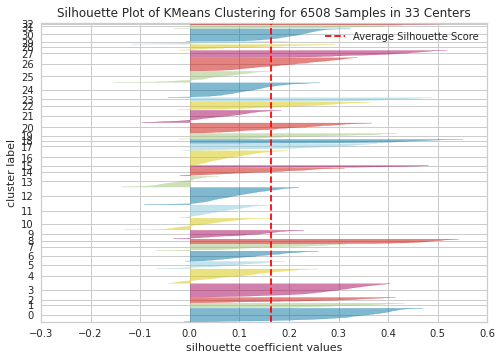

----------------------------------------------------------------------
For n_clusters = 34 The average silhouette_score is : 0.1509377771098667


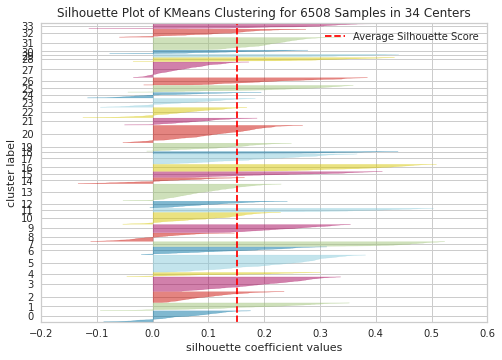

----------------------------------------------------------------------
For n_clusters = 35 The average silhouette_score is : 0.16236911590451517


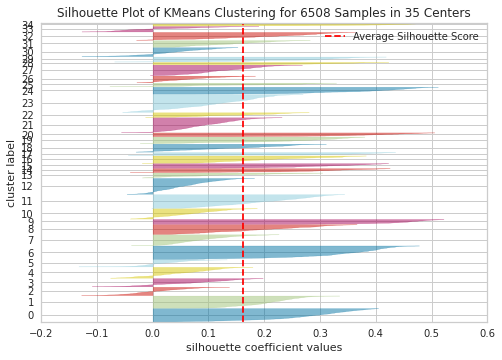

----------------------------------------------------------------------
For n_clusters = 36 The average silhouette_score is : 0.15716804855527297


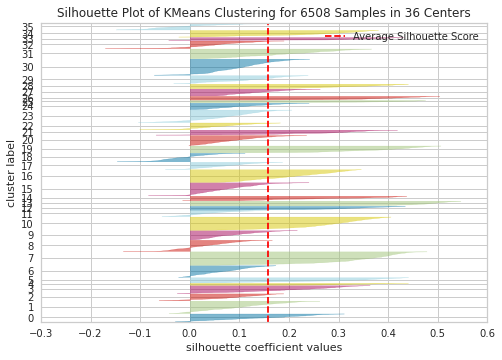

----------------------------------------------------------------------
For n_clusters = 37 The average silhouette_score is : 0.17224436732732842


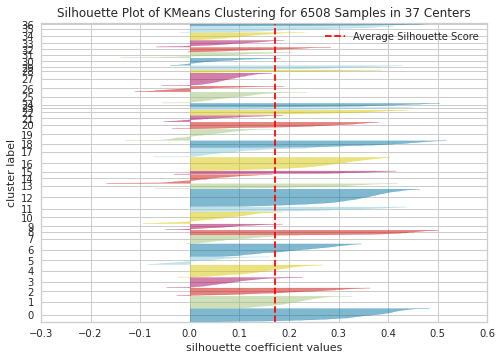

----------------------------------------------------------------------
For n_clusters = 38 The average silhouette_score is : 0.16189033169575467


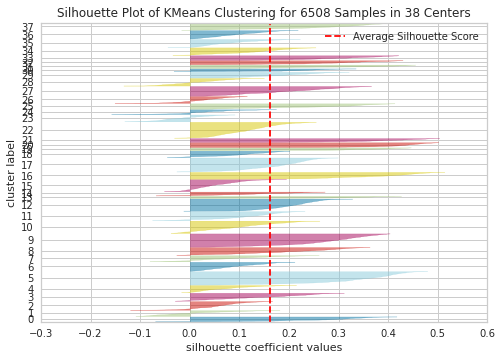

----------------------------------------------------------------------
For n_clusters = 39 The average silhouette_score is : 0.17125814064358064


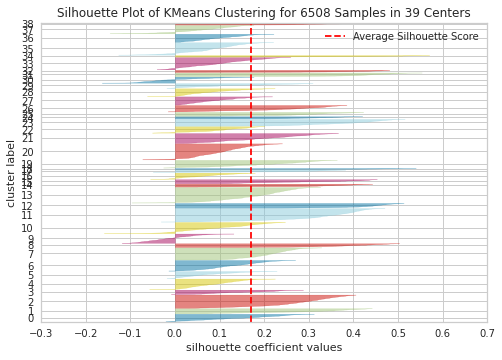

In [19]:

n_clusters = np.arange(2,40,1).tolist()

for n_clusters in n_clusters:
    
    print('-'*70)
    
    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'auto'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(principal85_df)
    
    silhouette_avg = silhouette_score(principal85_df, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(principal85_df)        # Fit the data to the visualizer
    visualizer.poof()

In [24]:
n_clusters = np.arange(2,100,1).tolist()

silhouette_avg = []
for num_clusters in n_clusters:
 
     # initialise kmeans
    model = KMeans(n_clusters=num_clusters)
    model.fit(principal85_df)
    cluster_labels = model.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(principal85_df, cluster_labels))


In [25]:
silhouette_scores = pd.DataFrame(
    {'n_clusters': n_clusters,
     'silhouette_scores': silhouette_avg
    })

In [26]:
import plotly.express as px
fig_silhouette = px.scatter(silhouette_scores, x = 'n_clusters', y = 'silhouette_scores', title = 'Silhouette scores for different number of clusters')
fig_silhouette.show()

In [27]:
fig_silhouette.write_image("../Data/Figures/fig_silhouette.png")

### Since we know that we have 33 types of cancer, let's try using k = 33 and see the results

In [28]:
model_pca_33 = KMeans(
        n_clusters=33,
        init='k-means++',
        n_jobs=-1,
        random_state=1)

model_pca_33 = model_pca_33.fit(principal85_df)

y = model_pca_33.predict(principal85_df)

/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



In [29]:
y_df = pd.DataFrame(y)

In [30]:
df_outliers = df_outliers.reset_index()

In [31]:
'''link back the predicted array to previous dataframe'''
pca_33 = pd.concat([df_outliers[:6508], y_df], axis=1)

In [32]:
pca_33.head()

Unnamed: 0  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0  TCGA-L5-A8NL-01               10.01             0.6623               10.86   
1  TCGA-NC-A5HM-01               12.04             0.0000               12.12   
2  TCGA-BH-A1EO-11               11.78            10.8100               11.01   
3  TCGA-BH-A1F8-01               12.17             1.3000               12.14   
4  TCGA-CR-7390-01               11.22             0.0000               10.76   

   ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0               9.422               9.346               9.413   
1               8.824               9.758               8.257   
2               9.578               8.361              11.240   
3              10.430               9.285               6.722   
4               9.884               9.767               8.796   

   ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
0               12.60               12.78               12.04  ...   
1               12.86               12.55               12.29  ...   
2               14.34               12.29               11.51  ...   
3               11.56               13.52               12.49  ...   
4               11.19               11.69               14.77  ...   

   ENSG00000280670.2  ENSG00000280789.1  ENSG00000280969.1  ENSG00000281106.2  \
0              6.610              10.09                0.0              2.642   
1              6.615              11.25                0.0              0.000   
2              5.437              10.15                0.0              0.000   
3              6.596              10.02                0.0              3.055   
4              5.983              10.81                0.0              1.804   

   ENSG00000281991.1  ENSG00000282419.1  ENSG00000282608.1  ENSG00000282757.1  \
0              8.415                0.0              8.619                0.0   
1             10.870                0.0              4.383                0.0   
2              7.296                0.0              8.153                0.0   
3              9.667                0.0              8.960                0.0   
4             10.640                0.0              6.289                0.0   

   ENSG00000282815.1   0  
0             0.6623   4  
1             8.6340  26  
2             0.0000   3  
3             0.0000   5  
4             0.0000  25  

[5 rows x 19039 columns]

In [33]:
pca_33['cluster'] = pca_33.iloc[:,-1]

In [34]:
pca_33.head()

Unnamed: 0  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0  TCGA-L5-A8NL-01               10.01             0.6623               10.86   
1  TCGA-NC-A5HM-01               12.04             0.0000               12.12   
2  TCGA-BH-A1EO-11               11.78            10.8100               11.01   
3  TCGA-BH-A1F8-01               12.17             1.3000               12.14   
4  TCGA-CR-7390-01               11.22             0.0000               10.76   

   ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0               9.422               9.346               9.413   
1               8.824               9.758               8.257   
2               9.578               8.361              11.240   
3              10.430               9.285               6.722   
4               9.884               9.767               8.796   

   ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
0               12.60               12.78               12.04  ...   
1               12.86               12.55               12.29  ...   
2               14.34               12.29               11.51  ...   
3               11.56               13.52               12.49  ...   
4               11.19               11.69               14.77  ...   

   ENSG00000280789.1  ENSG00000280969.1  ENSG00000281106.2  ENSG00000281991.1  \
0              10.09                0.0              2.642              8.415   
1              11.25                0.0              0.000             10.870   
2              10.15                0.0              0.000              7.296   
3              10.02                0.0              3.055              9.667   
4              10.81                0.0              1.804             10.640   

   ENSG00000282419.1  ENSG00000282608.1  ENSG00000282757.1  ENSG00000282815.1  \
0                0.0              8.619                0.0             0.6623   
1                0.0              4.383                0.0             8.6340   
2                0.0              8.153                0.0             0.0000   
3                0.0              8.960                0.0             0.0000   
4                0.0              6.289                0.0             0.0000   

    0  cluster  
0   4        4  
1  26       26  
2   3        3  
3   5        5  
4  25       25  

[5 rows x 19040 columns]

In [35]:
pca_33['sample'] = pca_33['Unnamed: 0']

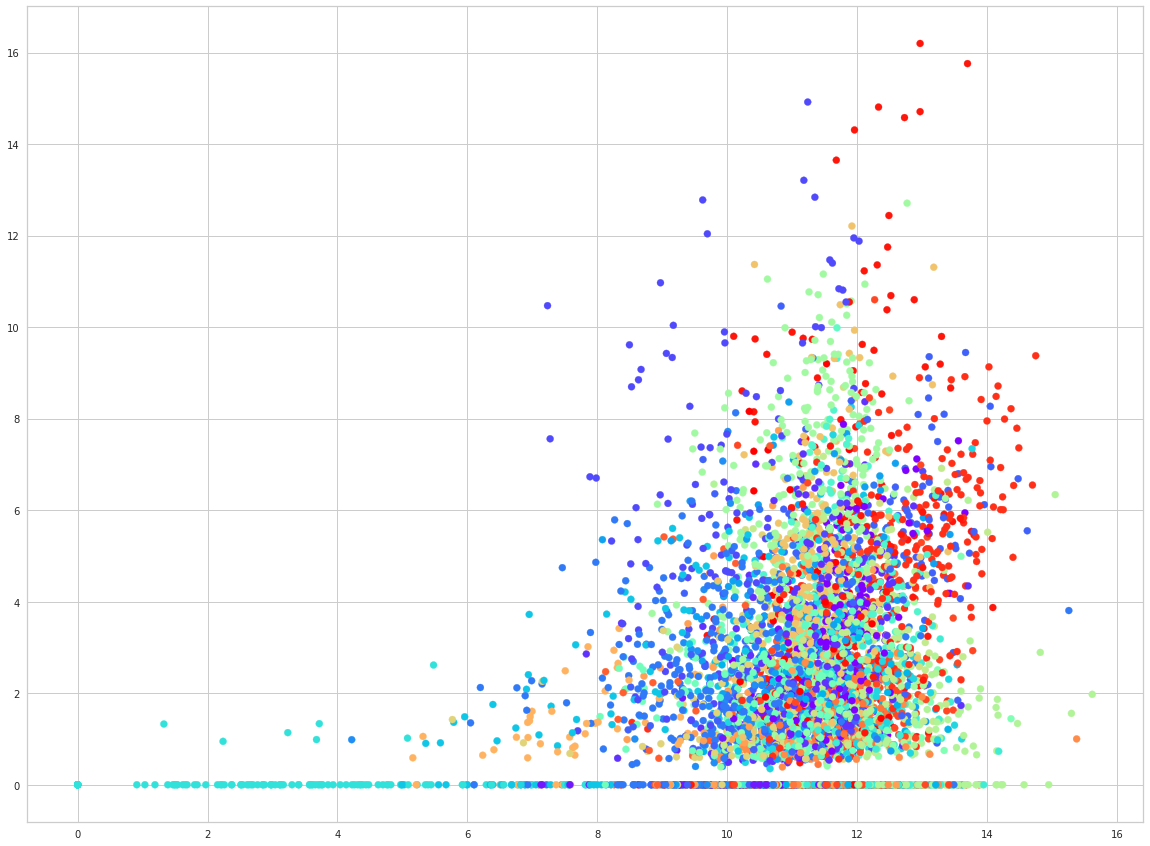

In [36]:
from matplotlib.pyplot import figure
figure(figsize = (20, 15))
plt.scatter(df_train_scaled.iloc[:,0],df_train_scaled.iloc[:,1], c = pca_33['cluster'], cmap = 'rainbow')

In [37]:
import plotly.express as px
fig_pca = px.scatter(df_train_scaled, x=df_train_scaled.iloc[:,0], y=df_train_scaled.iloc[:,1],color = pca_33['cluster'].astype(str), title = 'Clustering using K-means and 33 clusters', color_discrete_sequence=px.colors.qualitative.Alphabet)

fig_pca.show()

In [38]:
fig_pca.write_image("../Data/Figures/fig_pca.png")


In [39]:
categories = pd.read_csv('../Data/sample_categories.csv')

In [40]:
categories.head()

Unnamed: 0           sample detailed_category
0           1  TCGA-V4-A9EE-01    Uveal Melanoma
1           2  TCGA-VD-AA8N-01    Uveal Melanoma
2           3  TCGA-V4-A9EI-01    Uveal Melanoma
3           4  TCGA-VD-AA8O-01    Uveal Melanoma
4           5  TCGA-WC-A888-01    Uveal Melanoma

In [41]:
len(categories['detailed_category'].unique())

94

In [42]:
pca_cluster = pca_33.merge(categories, how = 'inner', right_on = 'sample', left_on ='sample')

In [43]:
import plotly.express as px

fig_33 = px.scatter(pca_cluster, x = pca_cluster['cluster'], color = pca_cluster['detailed_category'].astype(str),labels = {'detailed_category': 'category of sample', 'index':'sample index'},title = 'Categories of clusters using k-means and 33 clusters', height = 800, width = 1000, color_discrete_sequence=px.colors.qualitative.Alphabet)

In [44]:
fig_33.show()

In [45]:
fig_33.write_image("../Data/Figures/fig_33.png")

/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



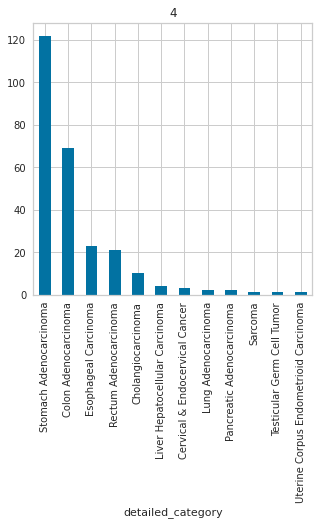

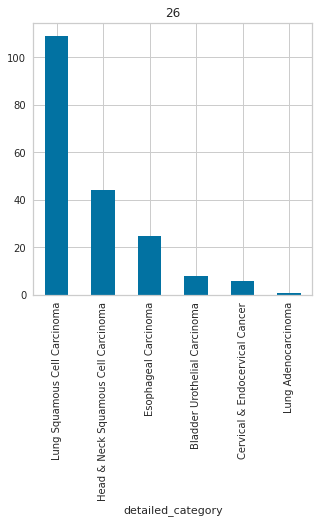

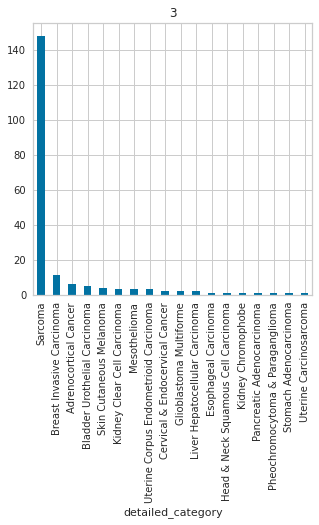

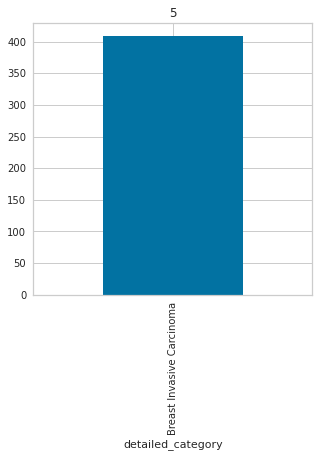

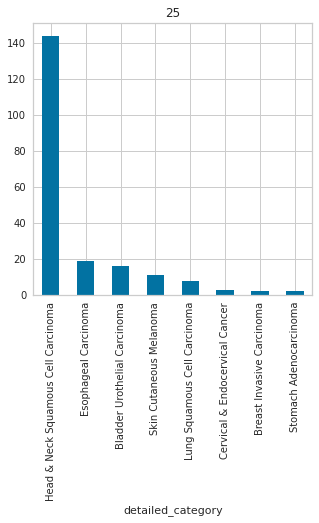

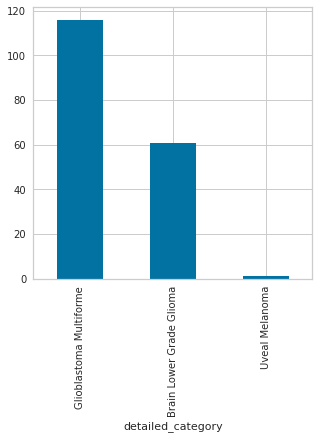

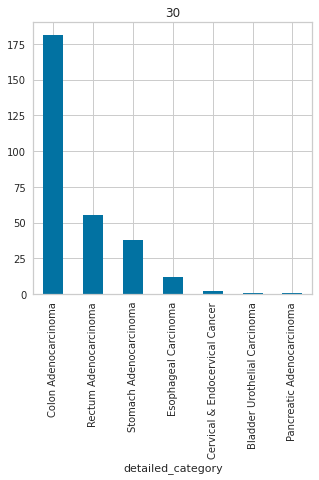

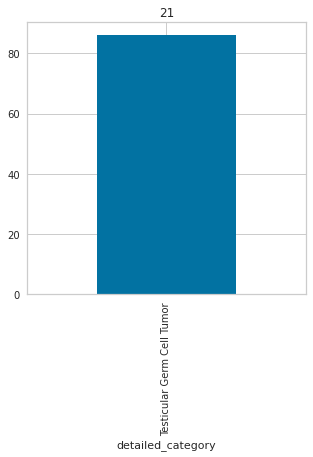

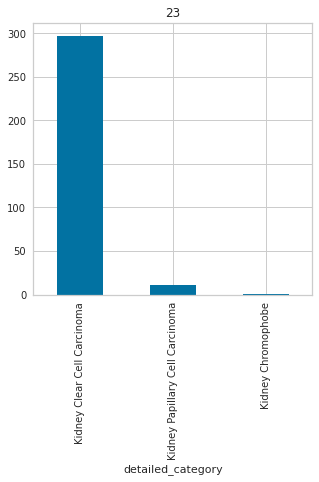

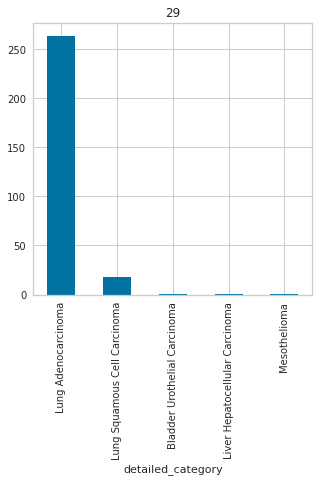

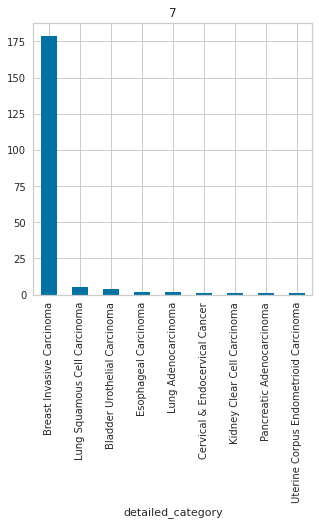

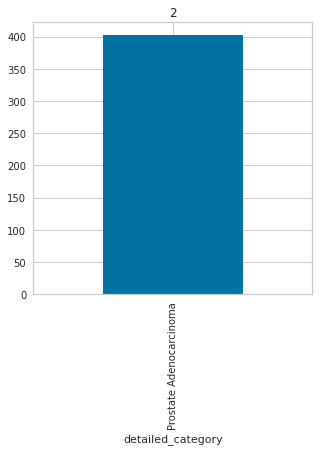

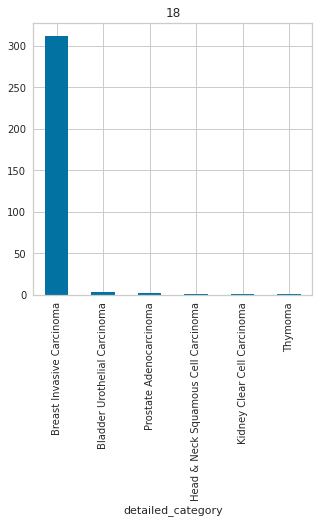

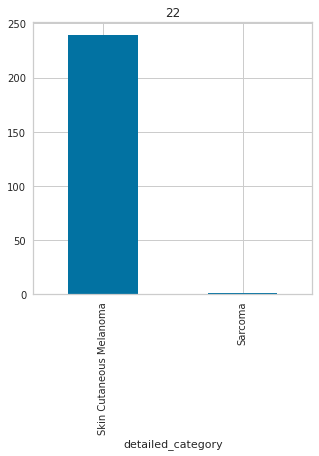

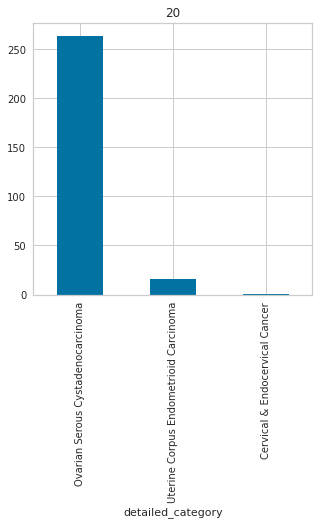

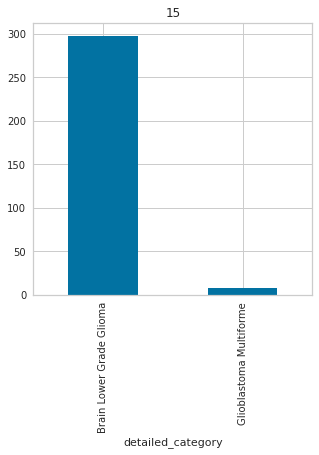

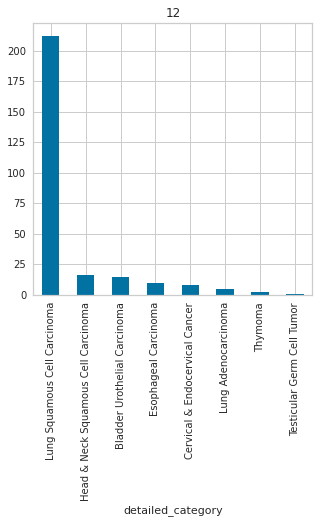

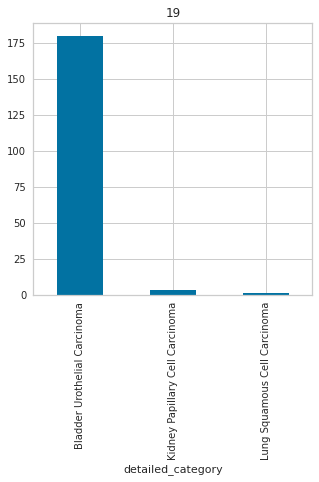

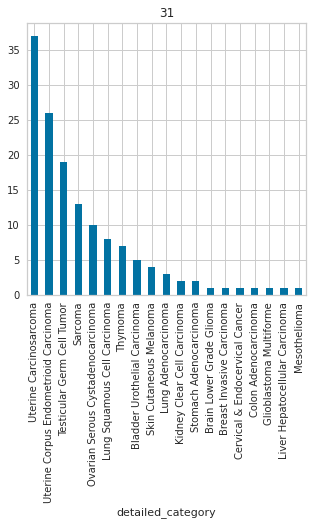

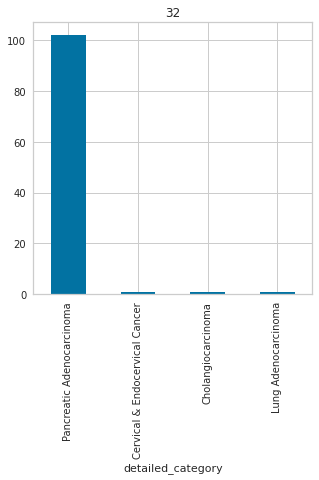

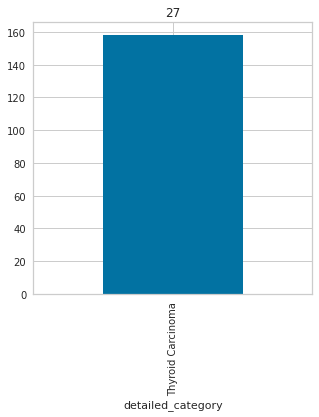

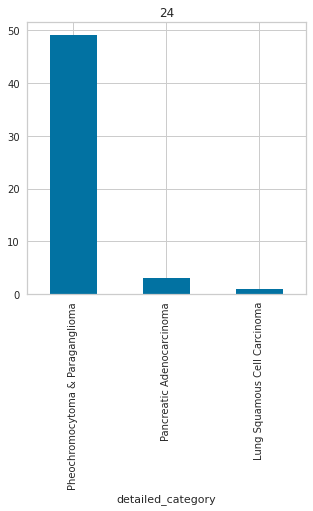

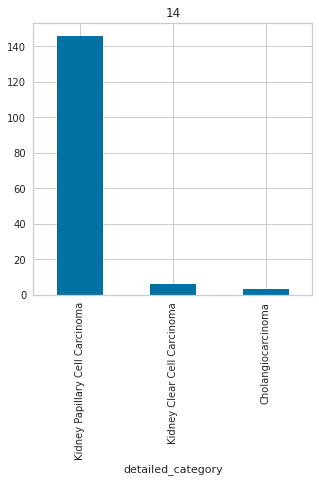

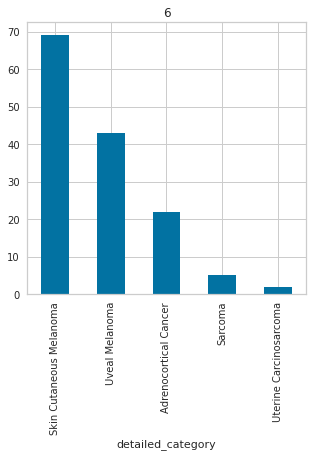

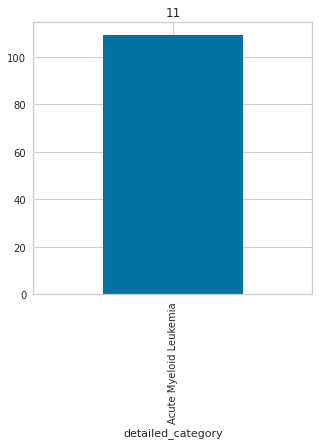

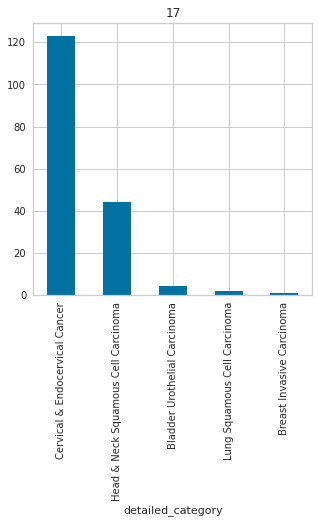

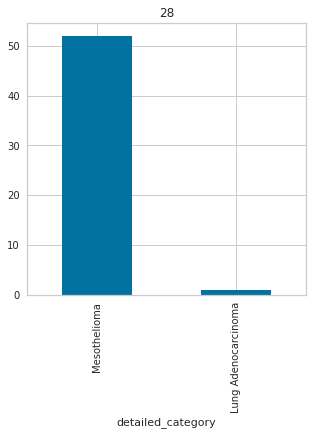

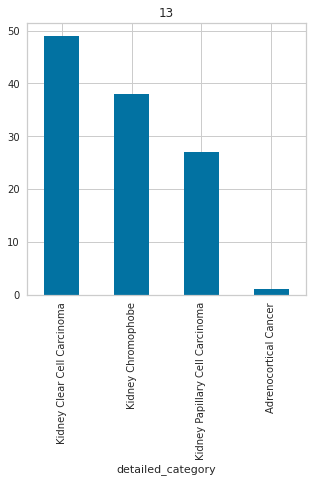

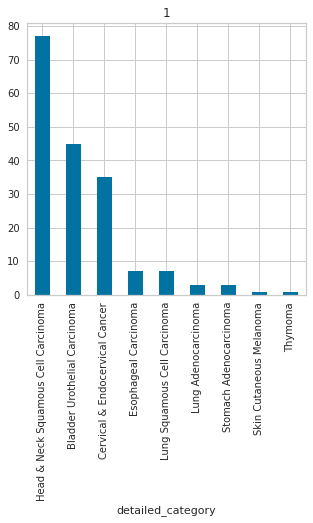

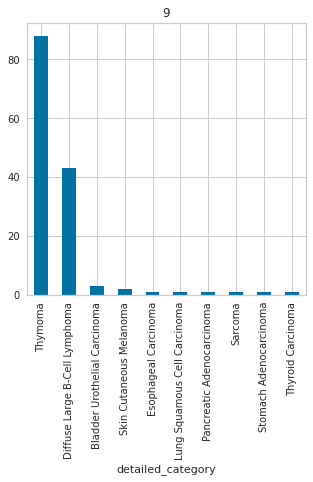

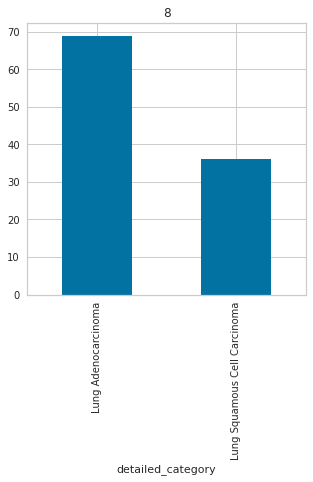

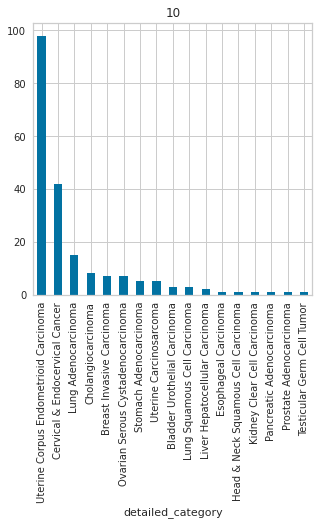

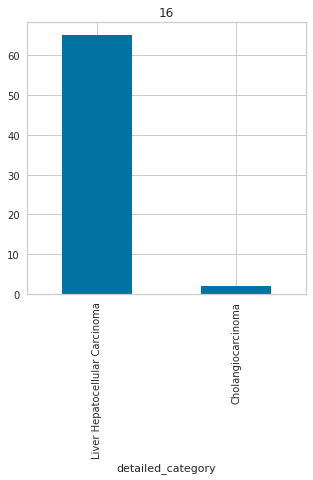

In [46]:
for i in pca_cluster['cluster'].unique():
    fig, ax = plt.subplots(figsize=(5,5))
    pca_cluster.groupby('cluster')['detailed_category'].value_counts()[i].plot(kind = 'bar', title = i ,ax = ax)



### Judging by the above figures our clustering is quite good. However it seems that it has split up some categories that could fall under the same cluster. 

### Let's try k =10, which is the number of clusters given by the elbow method

In [47]:
model_pca_10 = KMeans(
        n_clusters=10,
        init='k-means++',
        n_jobs=-1,
        random_state=1)

model_pca_10 = model_pca_10.fit(principal85_df)

y = model_pca_10.predict(principal85_df)

/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



In [48]:
y_df = pd.DataFrame(y)

In [49]:
'''link back the predicted array to previous dataframe'''
pca_10 = pd.concat([df_outliers[:6508], y_df], axis=1)

In [50]:
pca_10.head()

Unnamed: 0  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0  TCGA-L5-A8NL-01               10.01             0.6623               10.86   
1  TCGA-NC-A5HM-01               12.04             0.0000               12.12   
2  TCGA-BH-A1EO-11               11.78            10.8100               11.01   
3  TCGA-BH-A1F8-01               12.17             1.3000               12.14   
4  TCGA-CR-7390-01               11.22             0.0000               10.76   

   ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0               9.422               9.346               9.413   
1               8.824               9.758               8.257   
2               9.578               8.361              11.240   
3              10.430               9.285               6.722   
4               9.884               9.767               8.796   

   ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
0               12.60               12.78               12.04  ...   
1               12.86               12.55               12.29  ...   
2               14.34               12.29               11.51  ...   
3               11.56               13.52               12.49  ...   
4               11.19               11.69               14.77  ...   

   ENSG00000280670.2  ENSG00000280789.1  ENSG00000280969.1  ENSG00000281106.2  \
0              6.610              10.09                0.0              2.642   
1              6.615              11.25                0.0              0.000   
2              5.437              10.15                0.0              0.000   
3              6.596              10.02                0.0              3.055   
4              5.983              10.81                0.0              1.804   

   ENSG00000281991.1  ENSG00000282419.1  ENSG00000282608.1  ENSG00000282757.1  \
0              8.415                0.0              8.619                0.0   
1             10.870                0.0              4.383                0.0   
2              7.296                0.0              8.153                0.0   
3              9.667                0.0              8.960                0.0   
4             10.640                0.0              6.289                0.0   

   ENSG00000282815.1  0  
0             0.6623  7  
1             8.6340  1  
2             0.0000  9  
3             0.0000  0  
4             0.0000  1  

[5 rows x 19039 columns]

In [51]:
pca_10['cluster'] = pca_10.iloc[:,-1]
pca_10['sample'] = pca_10['Unnamed: 0']

In [52]:
import plotly.express as px
fig_10 = px.scatter(df_train_scaled, x=df_train_scaled.iloc[:,0], y=df_train_scaled.iloc[:,1],color = pca_10['cluster'].astype(str), title = 'Clustering using K-means and 10 clusters', color_discrete_sequence=px.colors.qualitative.Alphabet)

fig_10.show()

In [53]:
pca_cluster_10 = pca_10.merge(categories, how = 'inner', right_on = 'sample', left_on ='sample')

In [54]:
fig_10_categories = px.scatter(pca_cluster_10, x=pca_cluster_10['cluster'],color = pca_cluster_10['detailed_category'].astype(str), title = 'Categories of clusters using K-means and 10 clusters', color_discrete_sequence=px.colors.qualitative.Alphabet)

fig_10_categories.show()

### Let's examine the clusters to see what categories of samples they contain:


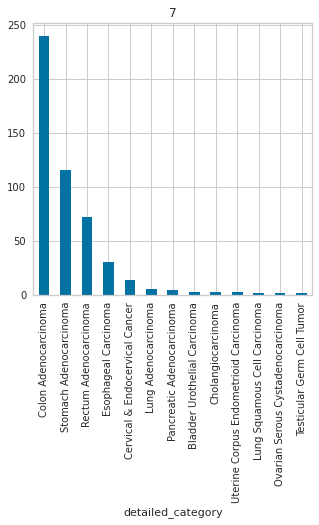

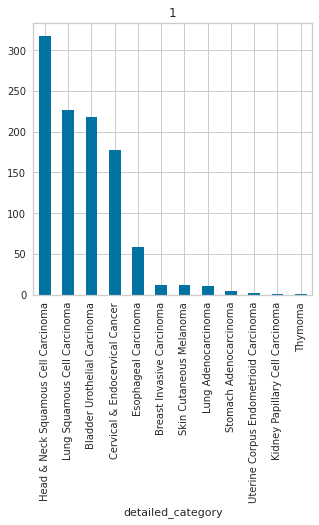

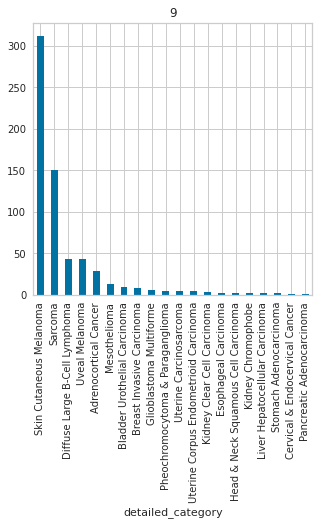

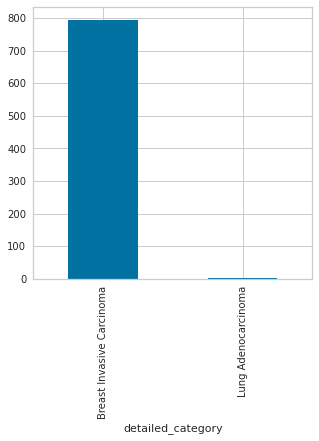

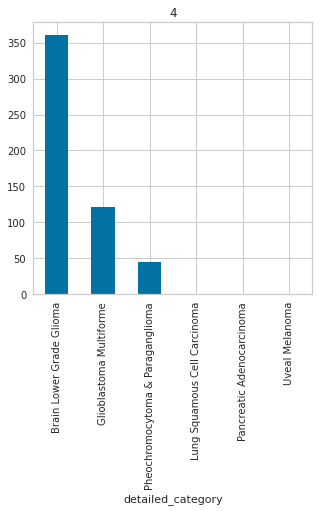

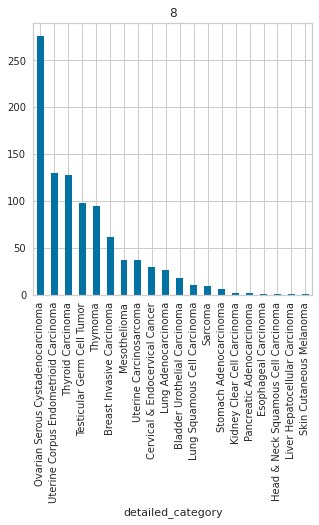

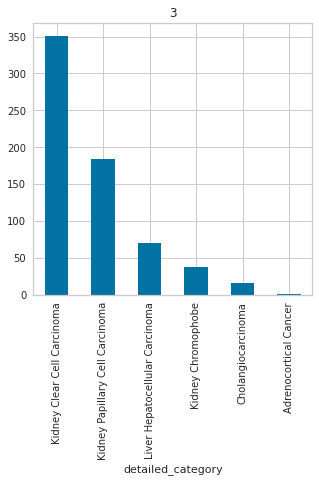

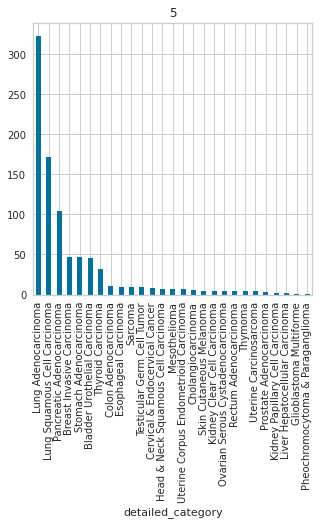

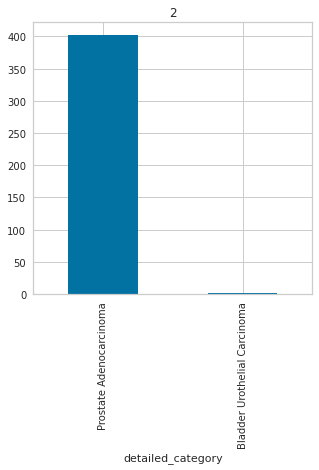

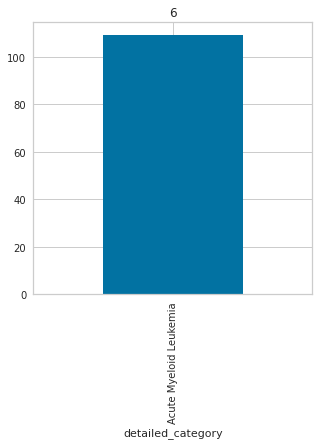

In [55]:
for i in pca_cluster_10['cluster'].unique():
    fig, ax = plt.subplots(figsize=(5,5))
    pca_cluster_10.groupby('cluster')['detailed_category'].value_counts()[i].plot(kind = 'bar', title = i ,ax = ax)


In [57]:
fig_10.write_image("../Data/Figures/fig_10.png")

fig_10_categories.write_image("../Data/Figures/fig_10_categories.png")

### By looking at the categories contained in each cluster we see that our clustering using k = 10 does not give satisfactory results. Some clusters like cluster 4 contain only prostate cancers which show that our clustering algorithm works good enough but others contain multiple unrelated cancers. We will attempt clustering using  k =15 which had the best silhouette score

In [58]:
model_pca_15 = KMeans(
        n_clusters=15,
        init='k-means++',
        n_jobs=-1,
        random_state=1)

model_pca_15 = model_pca_15.fit(principal85_df)

y = model_pca_15.predict(principal85_df)

/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



In [59]:
y_df = pd.DataFrame(y)

In [60]:
pca_15 = pd.concat([df_outliers[:6508], y_df], axis=1)

In [61]:
pca_15.head()

Unnamed: 0  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0  TCGA-L5-A8NL-01               10.01             0.6623               10.86   
1  TCGA-NC-A5HM-01               12.04             0.0000               12.12   
2  TCGA-BH-A1EO-11               11.78            10.8100               11.01   
3  TCGA-BH-A1F8-01               12.17             1.3000               12.14   
4  TCGA-CR-7390-01               11.22             0.0000               10.76   

   ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0               9.422               9.346               9.413   
1               8.824               9.758               8.257   
2               9.578               8.361              11.240   
3              10.430               9.285               6.722   
4               9.884               9.767               8.796   

   ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
0               12.60               12.78               12.04  ...   
1               12.86               12.55               12.29  ...   
2               14.34               12.29               11.51  ...   
3               11.56               13.52               12.49  ...   
4               11.19               11.69               14.77  ...   

   ENSG00000280670.2  ENSG00000280789.1  ENSG00000280969.1  ENSG00000281106.2  \
0              6.610              10.09                0.0              2.642   
1              6.615              11.25                0.0              0.000   
2              5.437              10.15                0.0              0.000   
3              6.596              10.02                0.0              3.055   
4              5.983              10.81                0.0              1.804   

   ENSG00000281991.1  ENSG00000282419.1  ENSG00000282608.1  ENSG00000282757.1  \
0              8.415                0.0              8.619                0.0   
1             10.870                0.0              4.383                0.0   
2              7.296                0.0              8.153                0.0   
3              9.667                0.0              8.960                0.0   
4             10.640                0.0              6.289                0.0   

   ENSG00000282815.1   0  
0             0.6623   0  
1             8.6340  12  
2             0.0000   9  
3             0.0000   4  
4             0.0000   1  

[5 rows x 19039 columns]

In [62]:
pca_15['cluster'] = pca_15.iloc[:,-1]
pca_15['sample'] = pca_15['Unnamed: 0']

In [63]:
import plotly.express as px
fig_15 = px.scatter(df_train_scaled, x=df_train_scaled.iloc[:,0], y=df_train_scaled.iloc[:,1],color = pca_15['cluster'].astype(str), title = 'Clustering using K-means and 15 clusters',color_discrete_sequence=px.colors.qualitative.Alphabet)

fig_15.show()

In [64]:
pca_cluster_15 = pca_15.merge(categories, how = 'inner', right_on = 'sample', left_on ='sample')

In [65]:
fig_15_categories = px.scatter(pca_cluster_15, x=pca_cluster_15['cluster'],color = pca_cluster_15['detailed_category'].astype(str), title = 'Categories of clusters using K-means and 15 clusters', color_discrete_sequence=px.colors.qualitative.Alphabet)

fig_15_categories.show()

In [66]:
fig_15.write_image("../Data/Figures/fig_15.png")

fig_15_categories.write_image("../Data/Figures/fig_15_categories.png")

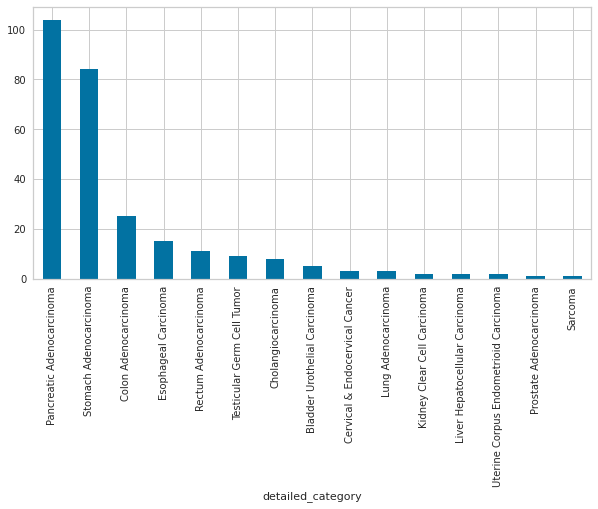

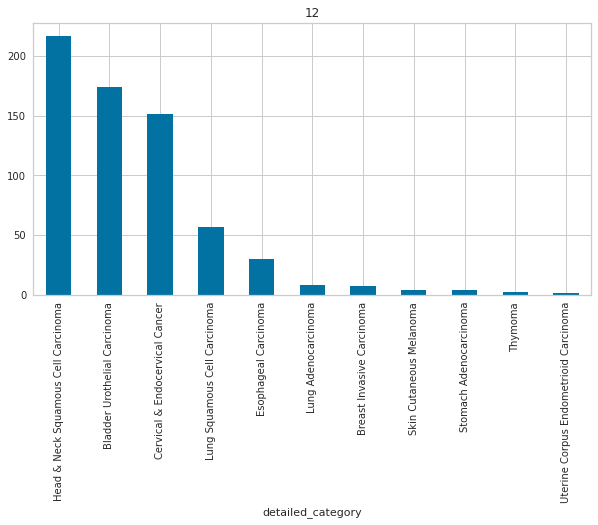

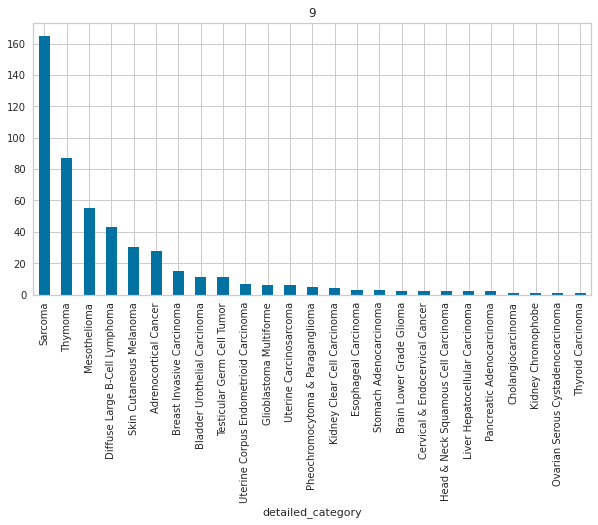

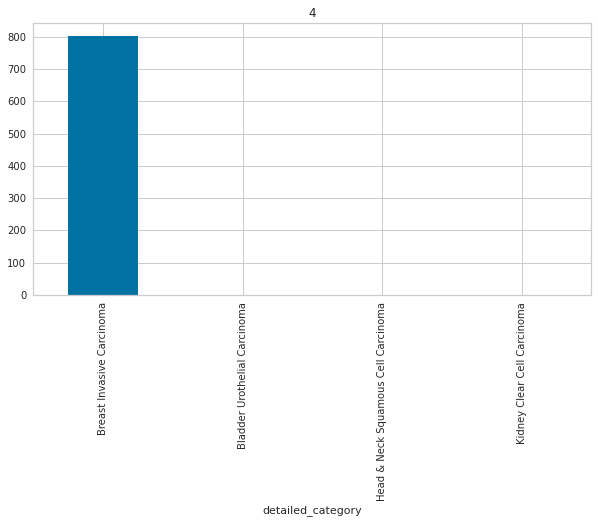

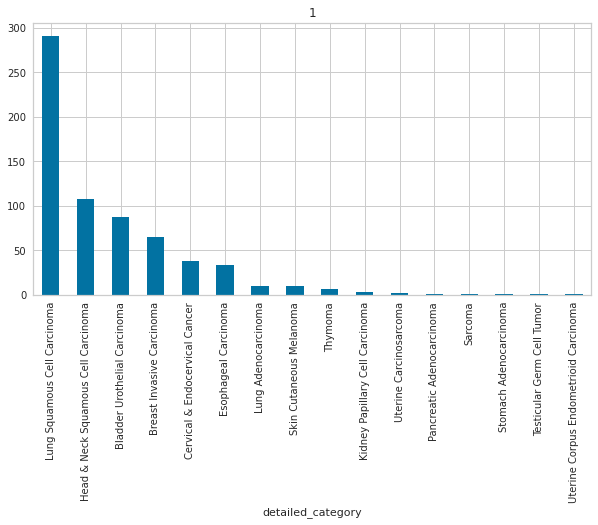

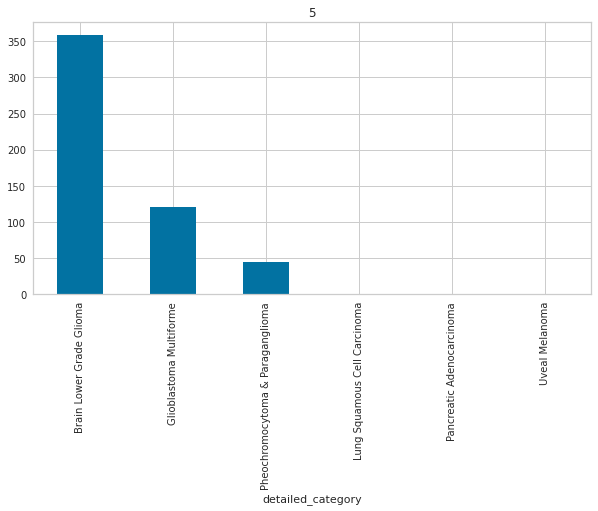

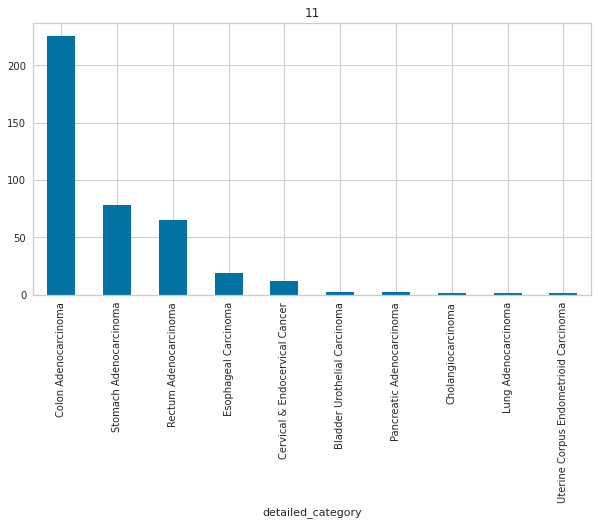

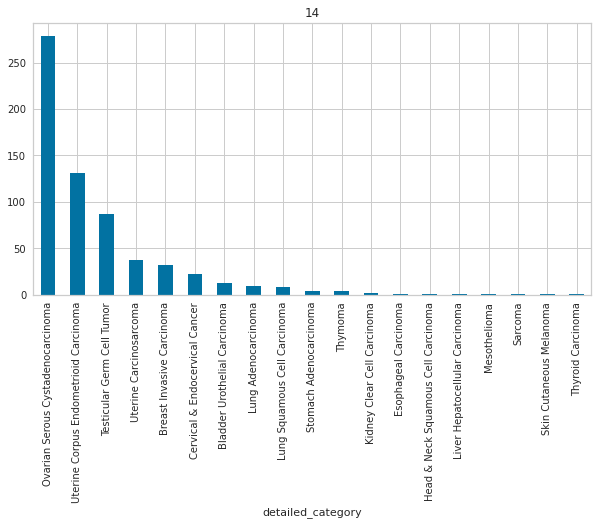

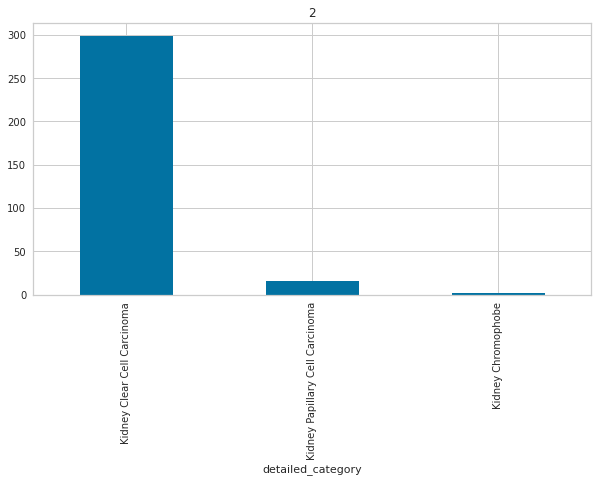

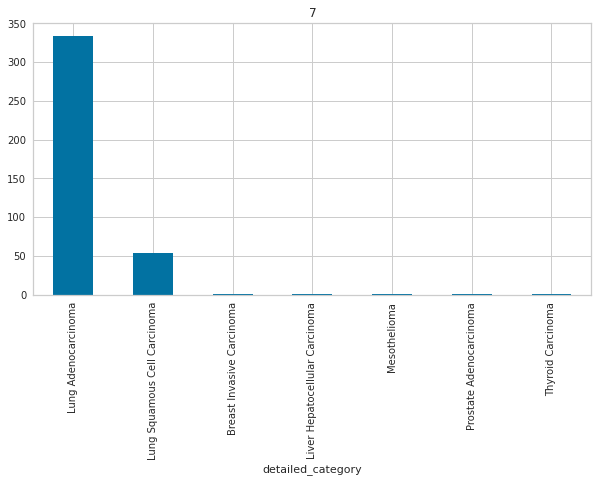

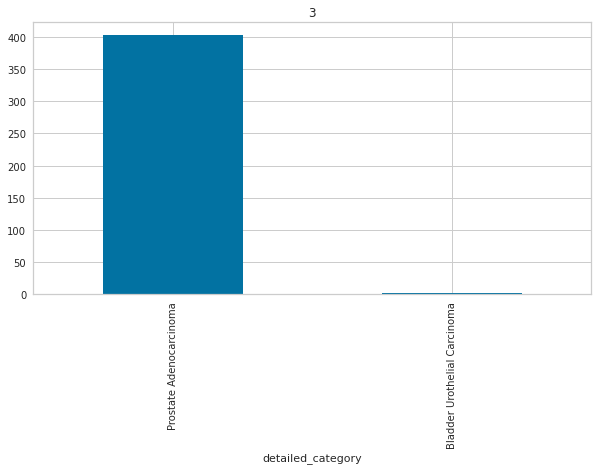

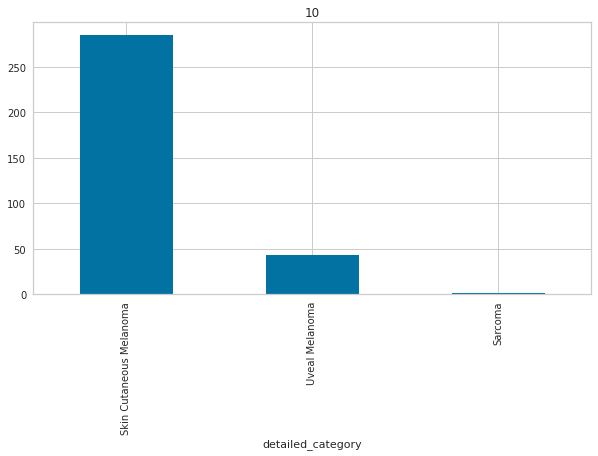

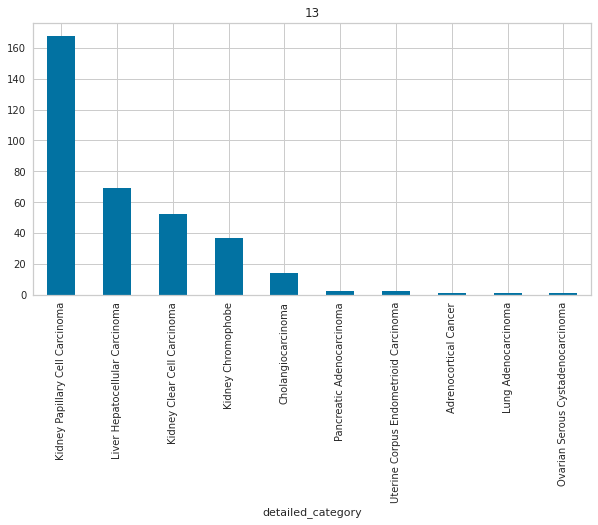

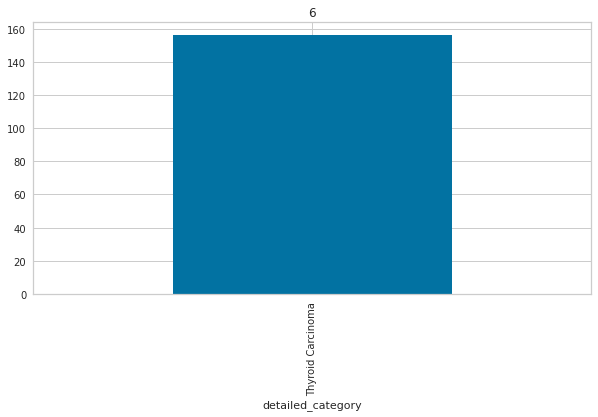

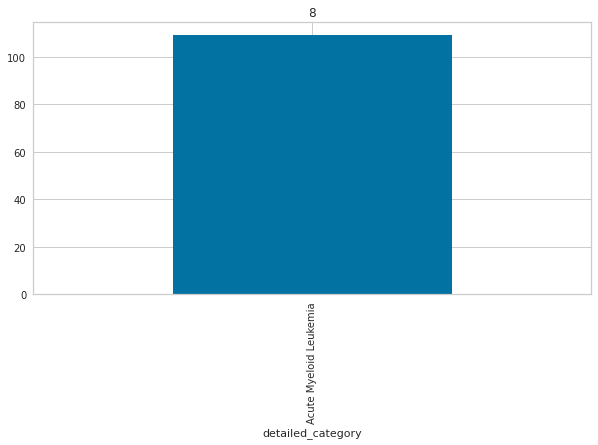

In [67]:
import numpy as np
for i in pca_cluster_15['cluster'].unique():
    fig, ax = plt.subplots(figsize=(10,5))

    pca_cluster_15.groupby('cluster')['detailed_category'].value_counts()[i].plot(kind = 'bar', title = i ,ax = ax)

    


### From the above analysis we can try labelling the clusters using the amount of samples they have from each category:

#### Cluster 0: Mainly contains Adenocarcinoma: Pancreatic Adenocarcinoma(100%), Stomach Adenocarcinoma (85/174), Colon Adenocarcinoma (23/251). -Cluster 0: Adenocarcinoma

#### Cluster 1: Lung Squamous Cell Carcinoma (280/400), Head and Neck Squamous Cell Carcinoma (105/328),  Bladder Urothelial Carcinoma (80/293).- Cluster 1: Squamous Cell Carcinomas

#### Cluster 2: Kidney Clear Cell Carcinoma (300/360), Kidney Papillary Cell Carcinoma (20/187) (Misclassified). Mainly contains Kidney Clear Cell Carcinomas. -Cluster 2: Kidney Clear Cell Carcinomas

#### Cluster 3: Prostate Adenocarcinoma (405/405). -Cluster 3: Prostate Adenocarcinoma

#### Cluster 4: Breast Invasive Carcinoma (810/922).- Cluster 4: Breast Invasive Carcinoma

#### Cluster 5: Brain Lower Glade Glioma (360/360), Glioblastoma Multiforme (127/127), Pheochromocytoma and Parangaglioma (48/50) - Both associated with the brain. It also contains 50 samples from pheochromocytoma & paraganglioma.- Cluster 5: Brain Related or Pheochromocytoma and Parangaglioma

#### Cluster 6: Thyroid Carcinoma (159/159).- Cluster 6: Thyroid Carcinoma

#### Cluster 7: Lung Adenocarcinoma (340/366), Lung Squamous Cell Carcinoma(55/411) - misclassified.- Cluster 7: Lung Adenocarcinoma

#### Cluster 8: Acute Myeloid Leucemia. -Cluster 8: Leucemia (109/109)

#### Cluster 9: Sarcoma(165/169), Thymoma(88/99), Mesothelioma(57/57), Diffuse Large B-Cell Lymphoma(43/43), Skin Cutaneous Melanoma(28/330)- misclassified, Adrenocortical Cancer(29/29). -Cluster 9: Sarcoma/Thymoma/Mesothelioma/Adrenocortical


#### Cluster 10: Skin Cutaneous Melanoma(290/330), Uveal Melanoma (44/44) - Cluster 10: Melanoma


#### Cluster 11: Colon Adenocarcinoma(251/251), Stomach Adenocarcinoma(75/174), Rectum Adenocarcinoma(65/76), Esophageal Carcinoma (30/101) -misclassified. Cluster 11:- Colon/Rectum Adenocarcinoma

#### Cluster 12: Head and neck squamous Cell Carcinoma (223/328), Bladder Urothelial Carcinoma(165/293), Cervical and Endocervical Cancer (155/228), Lung Squamous Cell Carcinoma(60/411), Esophageal Carcinoma (30/101).- Cluster 12: Unable to label

#### Cluster 13: Kidney Papillary Cell(170/187), Liver Hepatocellular Carcinoma(75/75), Kidney Clear Cell Carcinoma (60/360), Kidney Chromophobe(38/40), Cholangiocarcinoma(17/24).- Cluster 13: Associated with Kidney or Liver 

#### Cluster 14: Ovarian Cerous Cystadenocarcinoma, Uterine Corpus endometrioid carcinoma, Testicular Germ Cell Tumor, Uterine Adenocarcinoma - Cluster 14: Associated with the Reproductive system




In [68]:
 pca_cluster_15['detailed_category'].value_counts()

Breast Invasive Carcinoma                922
Lung Squamous Cell Carcinoma             411
Prostate Adenocarcinoma                  405
Lung Adenocarcinoma                      366
Kidney Clear Cell Carcinoma              360
Brain Lower Grade Glioma                 360
Skin Cutaneous Melanoma                  330
Head & Neck Squamous Cell Carcinoma      328
Bladder Urothelial Carcinoma             293
Ovarian Serous Cystadenocarcinoma        281
Colon Adenocarcinoma                     251
Cervical & Endocervical Cancer           228
Kidney Papillary Cell Carcinoma          187
Stomach Adenocarcinoma                   174
Sarcoma                                  169
Thyroid Carcinoma                        159
Uterine Corpus Endometrioid Carcinoma    145
Glioblastoma Multiforme                  127
Pancreatic Adenocarcinoma                112
Acute Myeloid Leukemia                   109
Testicular Germ Cell Tumor               108
Esophageal Carcinoma                     101
Thymoma   

## From the above analysis we get quite clear clusters. However lets attempt a couple of different clustering algorithms and decide on the best one before proceeding.

## 2) DBSCAN - We will apply also the DBSCAN clustering algorithm and compare it with the above results to see whether it produces better results

#### For large values of e, objects will all be consumed into one cluster
#### For small values of e, objects will break down into individual singletons


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 1).fit(principal85_df)
y = db.labels_
y_df = pd.DataFrame(y)
y_df.value_counts()


In [ ]:
db = DBSCAN(eps = 300).fit(principal85_df)
y = db.labels_
y_df = pd.DataFrame(y)
y_df.value_counts()

#### From the above we see that the best value for e is somewhere between  1 and 300. 

In [ ]:
db = DBSCAN(eps = 170).fit(principal85_df)
y = db.labels_
y_df = pd.DataFrame(y)
y_df.value_counts()

#### According to sklearn documentation for clustering, for large dataset instead of DBSCAN we can use OPTICS algorithm

In [ ]:
from sklearn.cluster import OPTICS

op = OPTICS(cluster_method = 'xi').fit(principal85_df)
y = op.labels_
y_df = pd.DataFrame(y)
y_df.value_counts()

## 3) Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch


In [ ]:
plt.figure(figsize=(25, 15))


plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(principal85_df, method  = "ward"))


### Clearly out of the clustering algorithms attempted,  the one with KMeans with k = 14 has yield the best results


## Let's apply our best algorithm of the above on the test set

In [69]:
#first we need to apply pca


principalcomponents_test = pca_85.transform(test)

principalcomponents_test = pd.DataFrame(data = principalcomponents_test)


test_y = model_pca_15.predict(principalcomponents_test)

In [70]:
test_y_df = pd.DataFrame(test_y)

In [71]:
test_y_df.value_counts()

4     183
1     165
14    165
12    162
9     135
5     129
7     102
11    102
3      99
10     93
13     91
0      77
2      59
6      45
8      20
dtype: int64

In [72]:
'''link back the predicted array to previous dataframe'''
pad_test_df = pd.concat([test.reset_index(),test_y_df], axis=1)

In [73]:
pad_test_df.head()

Unnamed: 0  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0  TCGA-BP-4771-01               9.665              2.190               9.827   
1  TCGA-EL-A3D1-01              11.430              1.583              10.310   
2  TCGA-A8-A09K-01               9.754              1.883               9.414   
3  TCGA-A8-A082-01               9.141              2.724              10.190   
4  TCGA-36-1575-01              11.490              3.201              10.840   

   ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0               9.772               8.153              10.580   
1               9.118               7.997               9.008   
2              10.730               8.167               7.121   
3              10.000               8.729               8.059   
4               9.653               9.365               5.716   

   ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
0              12.140              11.390              10.070  ...   
1              12.190              12.140               9.963  ...   
2               9.578               9.603               9.755  ...   
3              10.160              11.200              10.090  ...   
4               8.889              10.960              11.440  ...   

   ENSG00000280670.2  ENSG00000280789.1  ENSG00000280969.1  ENSG00000281106.2  \
0              5.822              10.01             0.7761              3.713   
1              5.457              11.66             0.0000              2.582   
2              7.394              11.35             0.0000              1.656   
3              6.093              10.46             0.0000              0.000   
4              9.260              10.67             0.0000              5.878   

   ENSG00000281991.1  ENSG00000282419.1  ENSG00000282608.1  ENSG00000282757.1  \
0              9.275                0.0             10.590             0.0000   
1             12.160                0.0              6.063             0.0000   
2              9.107                0.0              6.434             0.6207   
3              8.318                0.0              8.549             0.0000   
4              7.296                0.0              6.532             0.0000   

   ENSG00000282815.1   0  
0             3.1440   2  
1             0.9985   6  
2             8.4350   4  
3             0.0000   4  
4             3.5360  14  

[5 rows x 19039 columns]

In [74]:
pad_test_df['cluster'] = pad_test_df.iloc[:,-1]
pad_test_df['sample'] = pad_test_df['Unnamed: 0']

In [75]:
pad_test_df.head()

Unnamed: 0  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0  TCGA-BP-4771-01               9.665              2.190               9.827   
1  TCGA-EL-A3D1-01              11.430              1.583              10.310   
2  TCGA-A8-A09K-01               9.754              1.883               9.414   
3  TCGA-A8-A082-01               9.141              2.724              10.190   
4  TCGA-36-1575-01              11.490              3.201              10.840   

   ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0               9.772               8.153              10.580   
1               9.118               7.997               9.008   
2              10.730               8.167               7.121   
3              10.000               8.729               8.059   
4               9.653               9.365               5.716   

   ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
0              12.140              11.390              10.070  ...   
1              12.190              12.140               9.963  ...   
2               9.578               9.603               9.755  ...   
3              10.160              11.200              10.090  ...   
4               8.889              10.960              11.440  ...   

   ENSG00000280969.1  ENSG00000281106.2  ENSG00000281991.1  ENSG00000282419.1  \
0             0.7761              3.713              9.275                0.0   
1             0.0000              2.582             12.160                0.0   
2             0.0000              1.656              9.107                0.0   
3             0.0000              0.000              8.318                0.0   
4             0.0000              5.878              7.296                0.0   

   ENSG00000282608.1  ENSG00000282757.1  ENSG00000282815.1   0  cluster  \
0             10.590             0.0000             3.1440   2        2   
1              6.063             0.0000             0.9985   6        6   
2              6.434             0.6207             8.4350   4        4   
3              8.549             0.0000             0.0000   4        4   
4              6.532             0.0000             3.5360  14       14   

            sample  
0  TCGA-BP-4771-01  
1  TCGA-EL-A3D1-01  
2  TCGA-A8-A09K-01  
3  TCGA-A8-A082-01  
4  TCGA-36-1575-01  

[5 rows x 19041 columns]

In [77]:
test_cluster = pad_test_df.merge(categories, how = 'inner', right_on = 'sample', left_on ='sample')

In [78]:
test_cluster.head()

Unnamed: 0_x  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0  TCGA-BP-4771-01               9.665              2.190               9.827   
1  TCGA-EL-A3D1-01              11.430              1.583              10.310   
2  TCGA-A8-A09K-01               9.754              1.883               9.414   
3  TCGA-A8-A082-01               9.141              2.724              10.190   
4  TCGA-36-1575-01              11.490              3.201              10.840   

   ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0               9.772               8.153              10.580   
1               9.118               7.997               9.008   
2              10.730               8.167               7.121   
3              10.000               8.729               8.059   
4               9.653               9.365               5.716   

   ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
0              12.140              11.390              10.070  ...   
1              12.190              12.140               9.963  ...   
2               9.578               9.603               9.755  ...   
3              10.160              11.200              10.090  ...   
4               8.889              10.960              11.440  ...   

   ENSG00000281991.1  ENSG00000282419.1  ENSG00000282608.1  ENSG00000282757.1  \
0              9.275                0.0             10.590             0.0000   
1             12.160                0.0              6.063             0.0000   
2              9.107                0.0              6.434             0.6207   
3              8.318                0.0              8.549             0.0000   
4              7.296                0.0              6.532             0.0000   

   ENSG00000282815.1   0  cluster           sample  Unnamed: 0_y  \
0             3.1440   2        2  TCGA-BP-4771-01          5980   
1             0.9985   6        6  TCGA-EL-A3D1-01           490   
2             8.4350   4        4  TCGA-A8-A09K-01          8498   
3             0.0000   4        4  TCGA-A8-A082-01          8787   
4             3.5360  14       14  TCGA-36-1575-01          3403   

                   detailed_category  
0        Kidney Clear Cell Carcinoma  
1                  Thyroid Carcinoma  
2          Breast Invasive Carcinoma  
3          Breast Invasive Carcinoma  
4  Ovarian Serous Cystadenocarcinoma  

[5 rows x 19043 columns]

In [79]:
test_cluster['detailed_category'][test_cluster['cluster'] == 0]

71         Pancreatic Adenocarcinoma
110           Stomach Adenocarcinoma
114             Colon Adenocarcinoma
146             Colon Adenocarcinoma
162           Stomach Adenocarcinoma
                    ...             
1519    Bladder Urothelial Carcinoma
1553            Esophageal Carcinoma
1568          Stomach Adenocarcinoma
1572      Testicular Germ Cell Tumor
1606          Stomach Adenocarcinoma
Name: detailed_category, Length: 77, dtype: object

In [80]:
fig_test = px.scatter(test_cluster, x = test_cluster['cluster'], color = test_cluster['detailed_category'].astype(str),labels = {'detailed_category': 'category of sample', 'index':'sample index'}, title = 'Test Clustering', height = 800, width = 1000,color_discrete_sequence=px.colors.qualitative.Alphabet)

In [81]:
fig_test.show()

In [82]:
fig_test.write_image('../Data/Figures/fig_test.png')

## We see from the above analysis that our clustering algorithm with 15 clusters has performed quite well on the test set. The samples have fallen into clusters according to the analysis we had before 